In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import missingno

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("./data.csv")
print(data.shape)
data.head(5)

(18207, 89)


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


各列特征含义
====
ID:                       球员代号<br>
Name:                     姓名<br>
Age:                      年龄<br>
Photo:                    照片网站（url）<br>
Nationality:              国籍<br>
Flag:                     国籍国旗（url）<br>
Overall:                  总体评价<br>
Potential:                潜力评价<br>
Club:                     效力俱乐部<br>
Club Logo:                俱乐部标志（url）<br>
Value:                    身价<br>
wage:                     工资<br>
special:<br>
Preferred Foot:           惯用脚<br>
International Reputation: 国际声誉<br>
Weak Foot:                弱点脚<br>
Skill Moves:              技能动作<br>
Work Rate:                攻防效率<br>
Body Type:                体型<br>
Real Face:                真实面孔？？？<br>
Position:                 位置<br>
Jersey Number:            球衣号码<br>
Joined:                   加入日期<br>
Loaned from:              贷款人？<br>
Contract Valid Until:     合同有效期<br>
Height/ Weight:           身高体重<br>
LS:                       左中锋;
ST:                       中锋;
RS:                       右中锋<br>
LW:                       左边锋;
LF:                       左前锋;
CF:                       中锋;
RF:                       右前锋;
RW:                       右边锋<br>
LAM:                      中场左前卫;
CAM:                      中场中前卫;
RAM:                      中场右前卫<br>
LM:                       左中场;
LCM:                      左中中场;
CM:                       中中场;
RCM:                      右中场;
RM:                       右中场<br>
LWB:                      左边后卫;
LDM:                      左边中后卫;
CDM:                      防守中场;
RDM:                      右边中后卫;
RWB:                      右边后卫<br>
LB:                       左后卫;
LCB:                      左中后卫;
CB:                       中后卫;
RCB:                      右中后卫;
RB:                       右后卫<br>
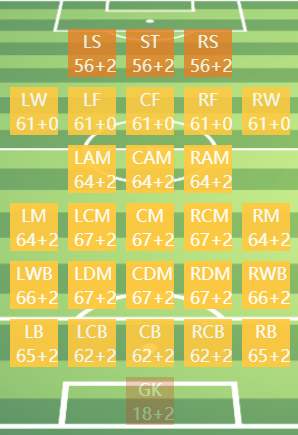
crossing:                 穿插<br>        
finishing:                完成度<br>
HeadingAccuracy:          头球准度<br>
ShortPassing:             短传<br>
Volleys:                  抽射<br>
Dribbling:                带球<br>
Curve:                    弧线<br>
FKAccuracy:               任意球精度<br>
LongPassing:              长传<br>
BallControl:              控球<br>
Acceleration:             加速<br>
SprintSpeed:              速度<br>
Agility:                  敏捷<br>
Reactions:                反应<br>
Balance:                  平衡<br>
ShotPower:                射门力量<br>
Jumping:                  弹跳<br>
Stamina:                  体能<br>
Strength:                 体质<br>
LongShots:                远射<br>
Aggression:               进攻性<br>
Interceptions:            拦截意识<br>
Positioning:              跑位<br>
Vision:                   视野<br>
Penalties:                点球<br>
Composure:                沉着<br> 
Marking:                  盯防<br>
StandingTackle:           抢断<br>
SlidingTackle:            铲球<br>
GKDiving:                 跳跃防守<br>
GKHandling:               手防<br>
GKKicking:                开球<br>
GKPositioning:            站位<br>
GKReflexes:               反应<br>
Release Clause:           违约金

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [4]:
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


<AxesSubplot:>

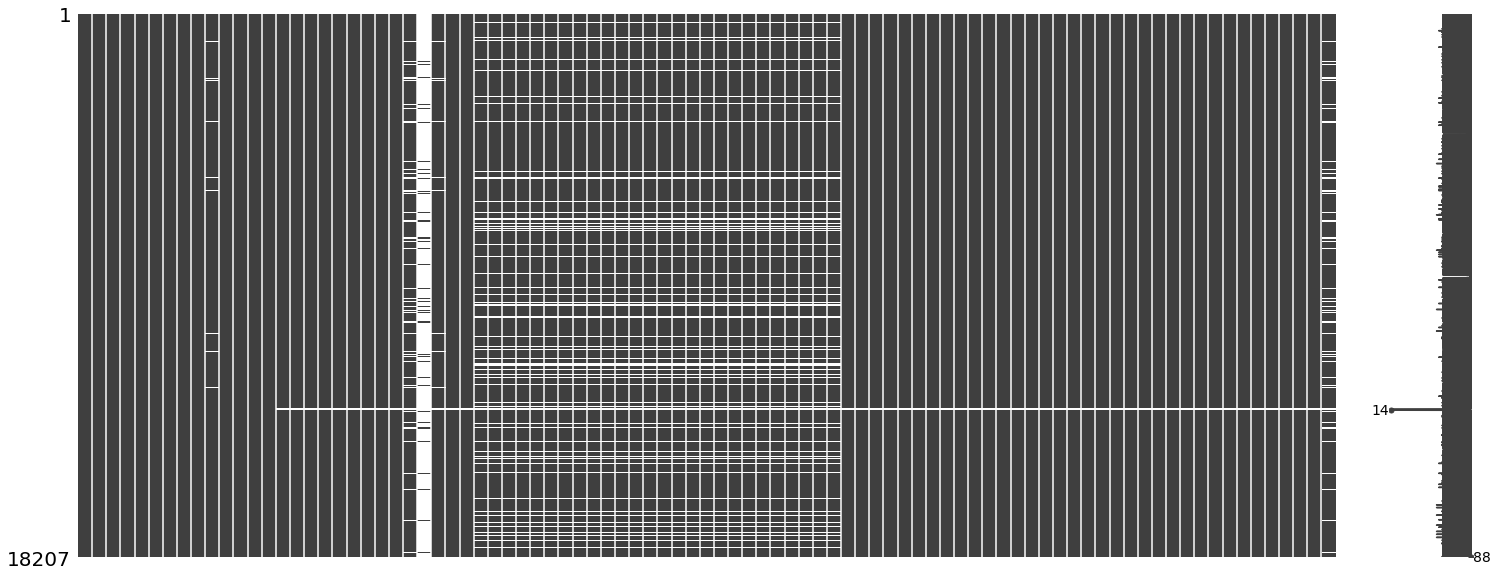

In [5]:
missingno.matrix(data)

Task 1. 左右脚球员数
====

In [6]:
data['Preferred Foot'].unique().tolist()

['Left', 'Right', nan]

In [7]:
print(f"NAN     {data['Preferred Foot'].isnull().sum()}")
print(data['Preferred Foot'].value_counts(ascending=True))

NAN     48
Left      4211
Right    13948
Name: Preferred Foot, dtype: int64


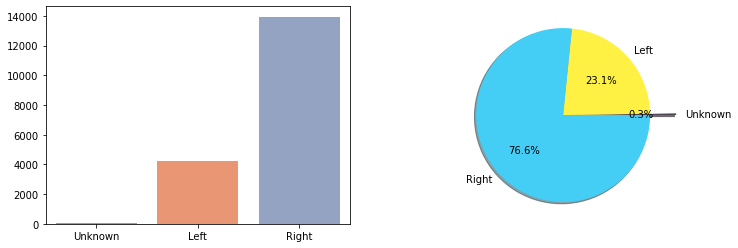

In [8]:
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(12, 4))
x = np.array([48, 4211, 13948])
colors = ['#392f41', '#fff143', '#44cef6']

sns.barplot(['Unknown', 'Left', 'Right'], x, ax=ax[0], palette='Set2')
ax[1].pie(x*100/data.shape[0], labels=['Unknown', 'Left', 'Right'],
          autopct='%1.1f%%', shadow=True, explode=(0.3, 0, 0), colors=colors)

plt.show()

Task 2.球员国籍分布
====

In [9]:
nations = data['Nationality'].unique().tolist()
print(len(nations))

164


In [10]:
print(f"Unknown : {data['Nationality'].isnull().sum()}")
data['Nationality'].value_counts(ascending=False)

Unknown : 0


England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
             ... 
Liberia         1
Mauritius       1
Oman            1
Rwanda          1
Grenada         1
Name: Nationality, Length: 164, dtype: int64

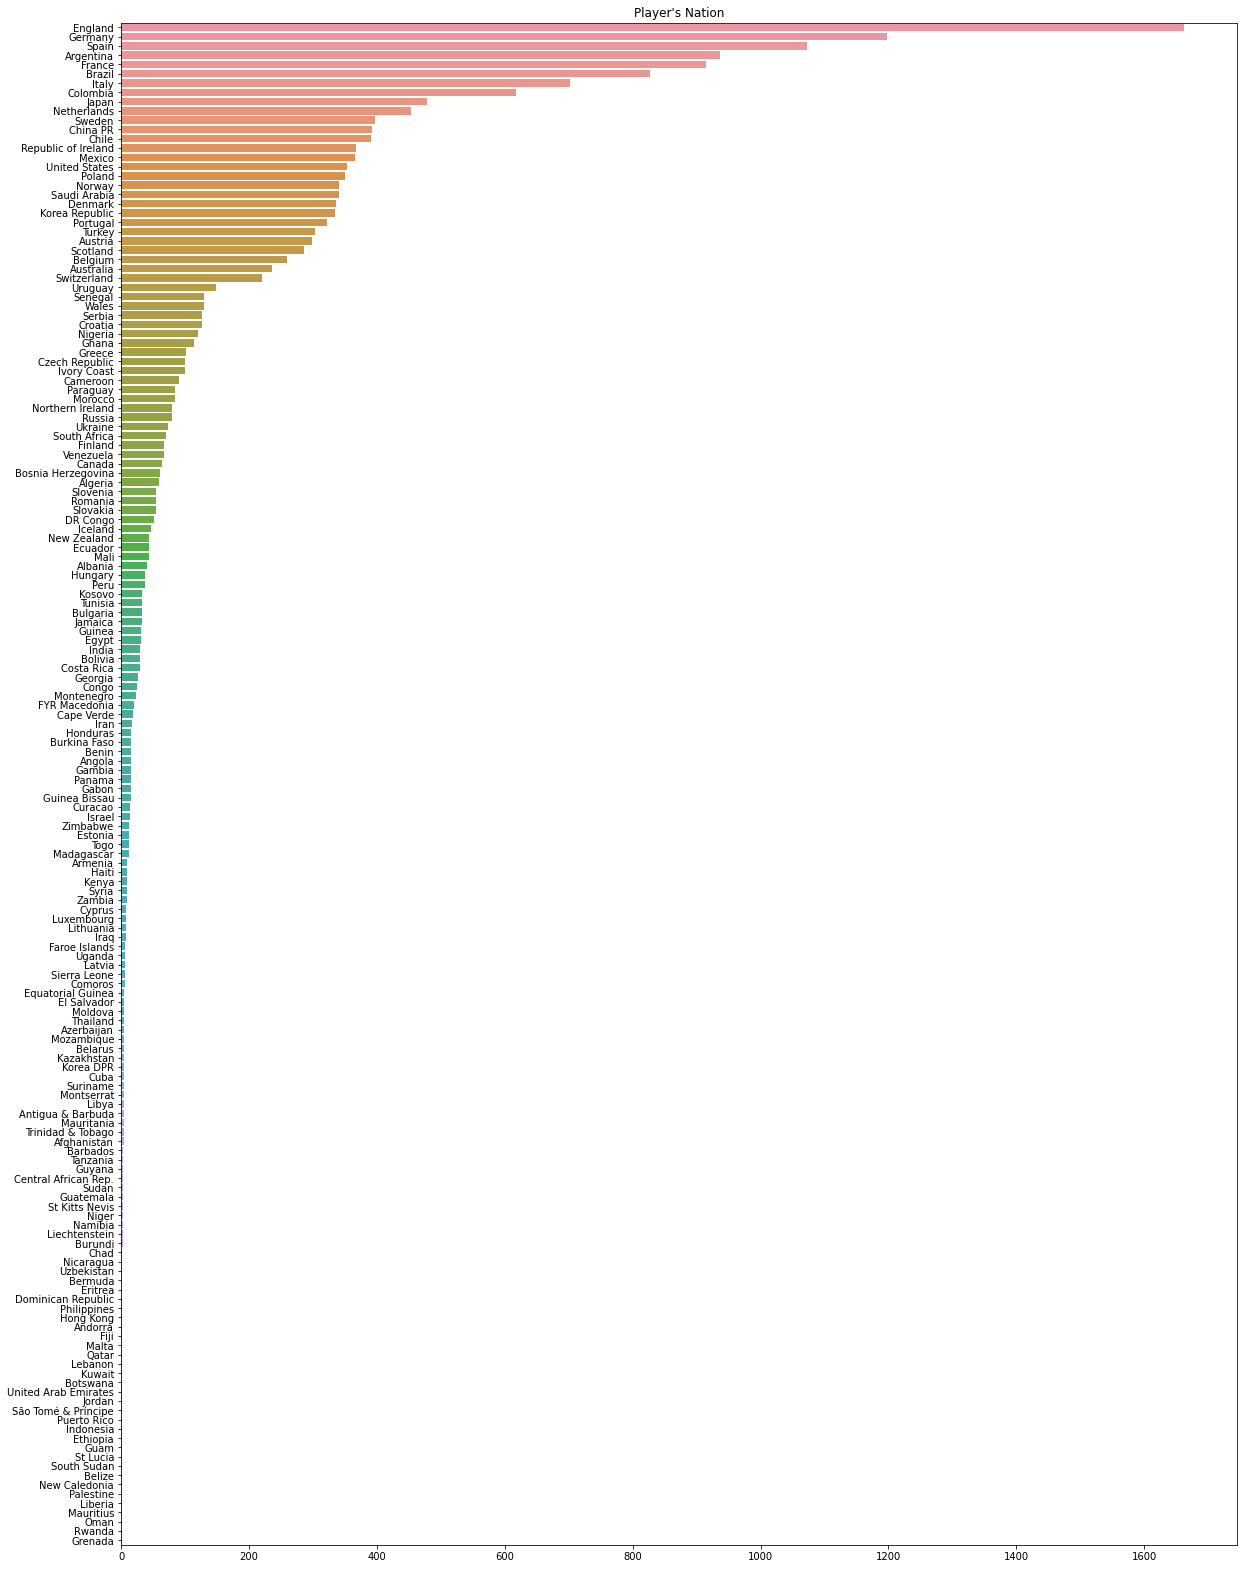

In [11]:
fig = plt.figure(figsize=(20, 28))
sns.barplot(pd.value_counts(data['Nationality']).values, pd.value_counts(
    data['Nationality']).index, orient='h')
plt.title("Player's Nation")
plt.show()

In [12]:
'''很多国家只有很少的运动员，因此将这类国家的运动员归为Others'''
data_nations = data['Nationality'].copy()
nations = data['Nationality'].unique().tolist()
for n in nations:
    if len(data_nations[data_nations == n]) < 20:
        data_nations[data_nations == n] = 'Other'
len(data_nations.unique())

75

In [13]:
pd.value_counts(data_nations)

England          1662
Germany          1198
Spain            1072
Argentina         937
France            914
                 ... 
India              30
Georgia            26
Congo              25
Montenegro         23
FYR Macedonia      20
Name: Nationality, Length: 75, dtype: int64

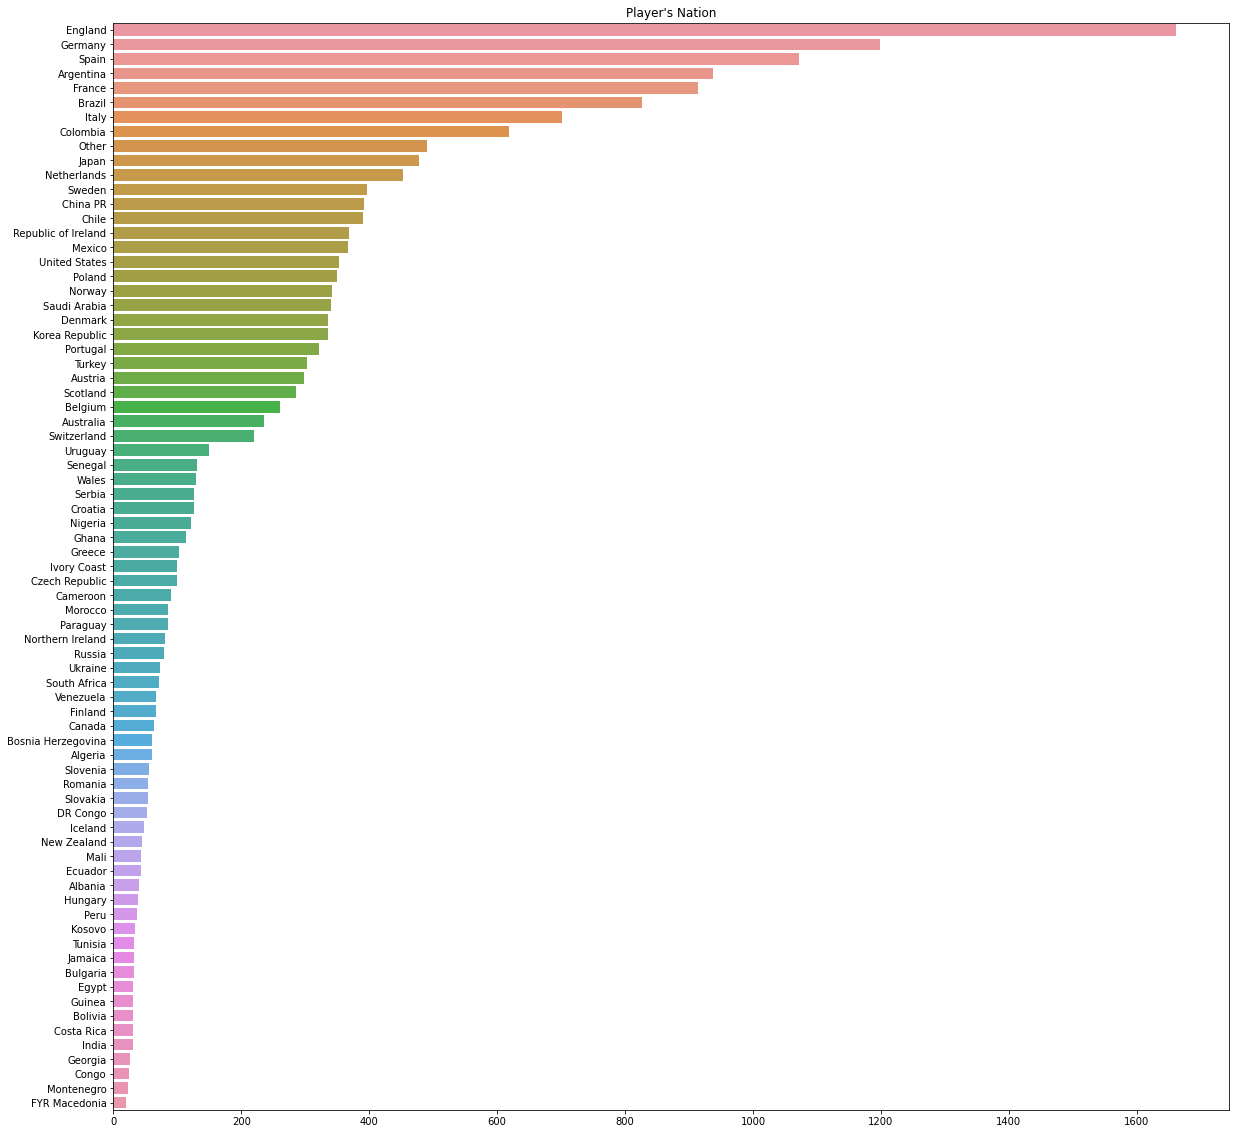

In [14]:
fig = plt.figure(figsize=(20, 20))
sns.barplot(pd.value_counts(data_nations).values,
            pd.value_counts(data_nations).index, orient='h')
plt.title("Player's Nation")
plt.show()

Task 3.统计工资在 100K ~ 500K之间的球员
====

In [15]:
data['Wage'].replace('[€K]', '', inplace=True, regex=True)
data['Wage'] = data['Wage'].astype(int)
data['Wage'].head(5)

0    565
1    405
2    290
3    260
4    355
Name: Wage, dtype: int32

In [16]:
wages = data[(data['Wage'] > 100) & (data['Wage'] < 500)].copy()
wages.shape

(184, 89)

In [17]:
wages = wages[['Name', 'Age', 'Nationality',
               'Club', 'Position', 'Wage']].reset_index()
wages.sort_values('Wage', ascending=False).head(5)

,index,Name,Age,Nationality,Club,Position,Wage
6,7,L. Suárez,31,Uruguay,FC Barcelona,RS,455
5,6,L. Modrić,32,Croatia,Real Madrid,RCM,420
0,1,Cristiano Ronaldo,33,Portugal,Juventus,ST,405
7,8,Sergio Ramos,32,Spain,Real Madrid,RCB,380
33,36,G. Bale,28,Wales,Real Madrid,ST,355


Task 4.球员位置分布
====

In [18]:
print(f"NAN     {data['Position'].isnull().sum()}")
positions = pd.value_counts(data['Position'])
positions

NAN     60


ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
RAM      21
LAM      21
RF       16
LF       15
Name: Position, dtype: int64

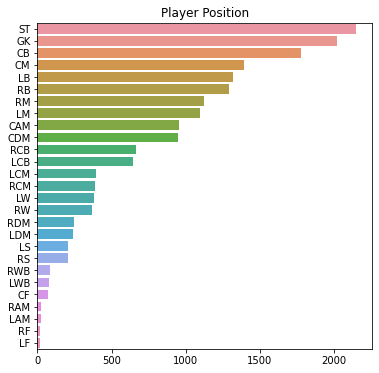

In [19]:
fig = plt.figure(figsize=(6, 6))
sns.barplot(positions.values, positions.index, orient='h')
plt.title("Player Position")
plt.show()

Task 5.年龄分布
====

In [20]:
ages = pd.value_counts(data['Age'])
ages

21    1423
26    1387
24    1358
22    1340
23    1332
25    1319
20    1240
27    1162
28    1101
19    1024
29     959
30     917
18     732
31     707
32     574
33     408
34     404
17     289
35     196
36     127
37      82
16      42
38      37
39      25
40      13
41       5
44       2
42       1
45       1
Name: Age, dtype: int64

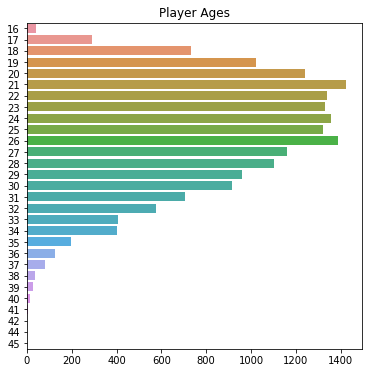

In [21]:
fig = plt.figure(figsize=(6, 6))
sns.barplot(ages.values, ages.index, orient='h')
plt.title("Player Ages")
plt.show()

Task 6.各国家/地区球员的平均评分
====

In [22]:
scores = data[['Nationality', 'Overall']].copy().groupby(
    'Nationality').agg(['mean', 'count'])
scores.columns = ['AVG-Overall', 'Count']
scores.sort_values(by='AVG-Overall', ascending=False).head(5)

,AVG-Overall,Count
Nationality,,
United Arab Emirates,77.000000,1
Central African Rep.,73.333333,3
Israel,72.142857,14
Dominican Republic,72.000000,2
São Tomé & Príncipe,72.000000,1


In [23]:
# 人太少没有参考意义
scores = scores[scores['Count'] >= 10]
scores.sort_values(by='AVG-Overall', ascending=False).head(5)

,AVG-Overall,Count
Nationality,,
Israel,72.142857,14
Cape Verde,71.631579,19
Portugal,71.344720,322
Togo,71.333333,12
Brazil,71.251511,827


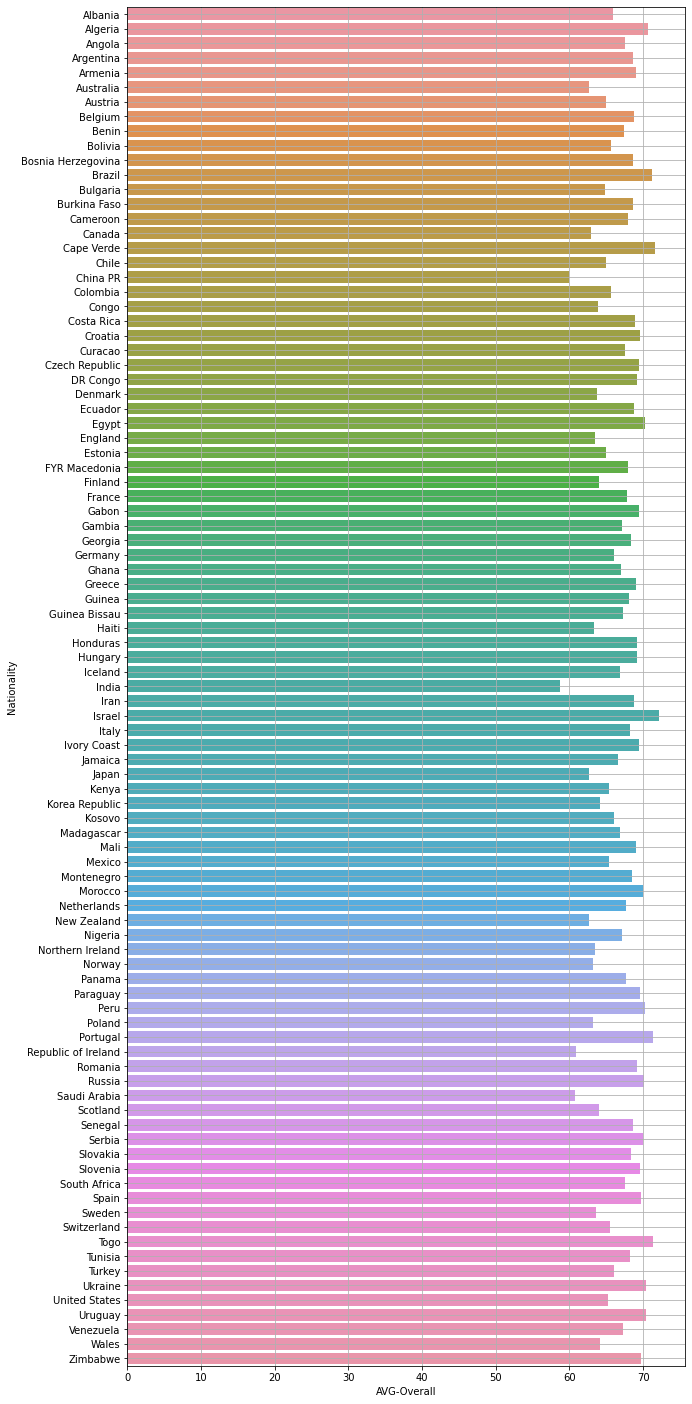

In [24]:
fig = plt.figure(figsize=(10, 25))
sns.barplot(scores['AVG-Overall'], scores.index, orient='h')
plt.grid()
plt.show()

In [25]:
forward = ['ST', 'CF', 'LW', 'RW', "RF", "LF", "RS", "LS", "LAM", "RAM"]
center = ["CAM", "CM", "LM", "RM", "CDM", "RCM", "LCM", "LDM", "RDM"]
guard = ["CB", "LB", "RB", "LWB", "RWB", "RCB", "LCB"]
gk = ['GK']

forwards = data[data.Position.isin(forward)]
forwards = forwards[['Nationality', 'Overall']].groupby('Nationality').agg(['mean', 'count'])
forwards.columns = ['Forward-Overall', 'Count']
forwards = forwards[forwards.Count > 10].sort_values(by='Forward-Overall', ascending=False)
forwards.head(5)

,Forward-Overall,Count
Nationality,,
Algeria,71.500000,16
Portugal,71.298246,57
Uruguay,71.230769,39
Brazil,70.900990,202
Serbia,70.608696,23


In [26]:
centers = data[data.Position.isin(center)]
centers = centers[['Nationality', 'Overall']].groupby('Nationality').agg(['mean', 'count'])
centers.columns = ['Center-Overall', 'Count']
centers = centers[centers.Count > 10].sort_values(by='Center-Overall', ascending=False)
centers.head(5)

,Center-Overall,Count
Nationality,,
Egypt,72.230769,13
Peru,71.714286,14
Portugal,71.620968,124
Algeria,71.541667,24
Brazil,71.358974,273


In [27]:
guards = data[data.Position.isin(guard)]
guards = guards[['Nationality', 'Overall']].groupby('Nationality').agg(['mean', 'count'])
guards.columns = ['Guard-Overall', 'Count']
guards = guards[guards.Count > 10].sort_values(by='Guard-Overall', ascending=False)
guards.head(5)

,Guard-Overall,Count
Nationality,,
Russia,72.857143,21
Brazil,71.592199,282
Portugal,71.366972,109
Paraguay,71.190476,21
Ukraine,70.954545,22


In [28]:
gks = data[data.Position.isin(gk)]
gks = gks[['Nationality', 'Overall']].groupby('Nationality').agg(['mean', 'count'])
gks.columns = ['GK-Overall', 'Count']
gks = gks[gks.Count > 10].sort_values(by='GK-Overall', ascending=False)
gks.head(5)

,GK-Overall,Count
Nationality,,
Uruguay,71.833333,12
Brazil,70.720588,68
Portugal,70.281250,32
Greece,69.705882,17
Czech Republic,69.437500,16


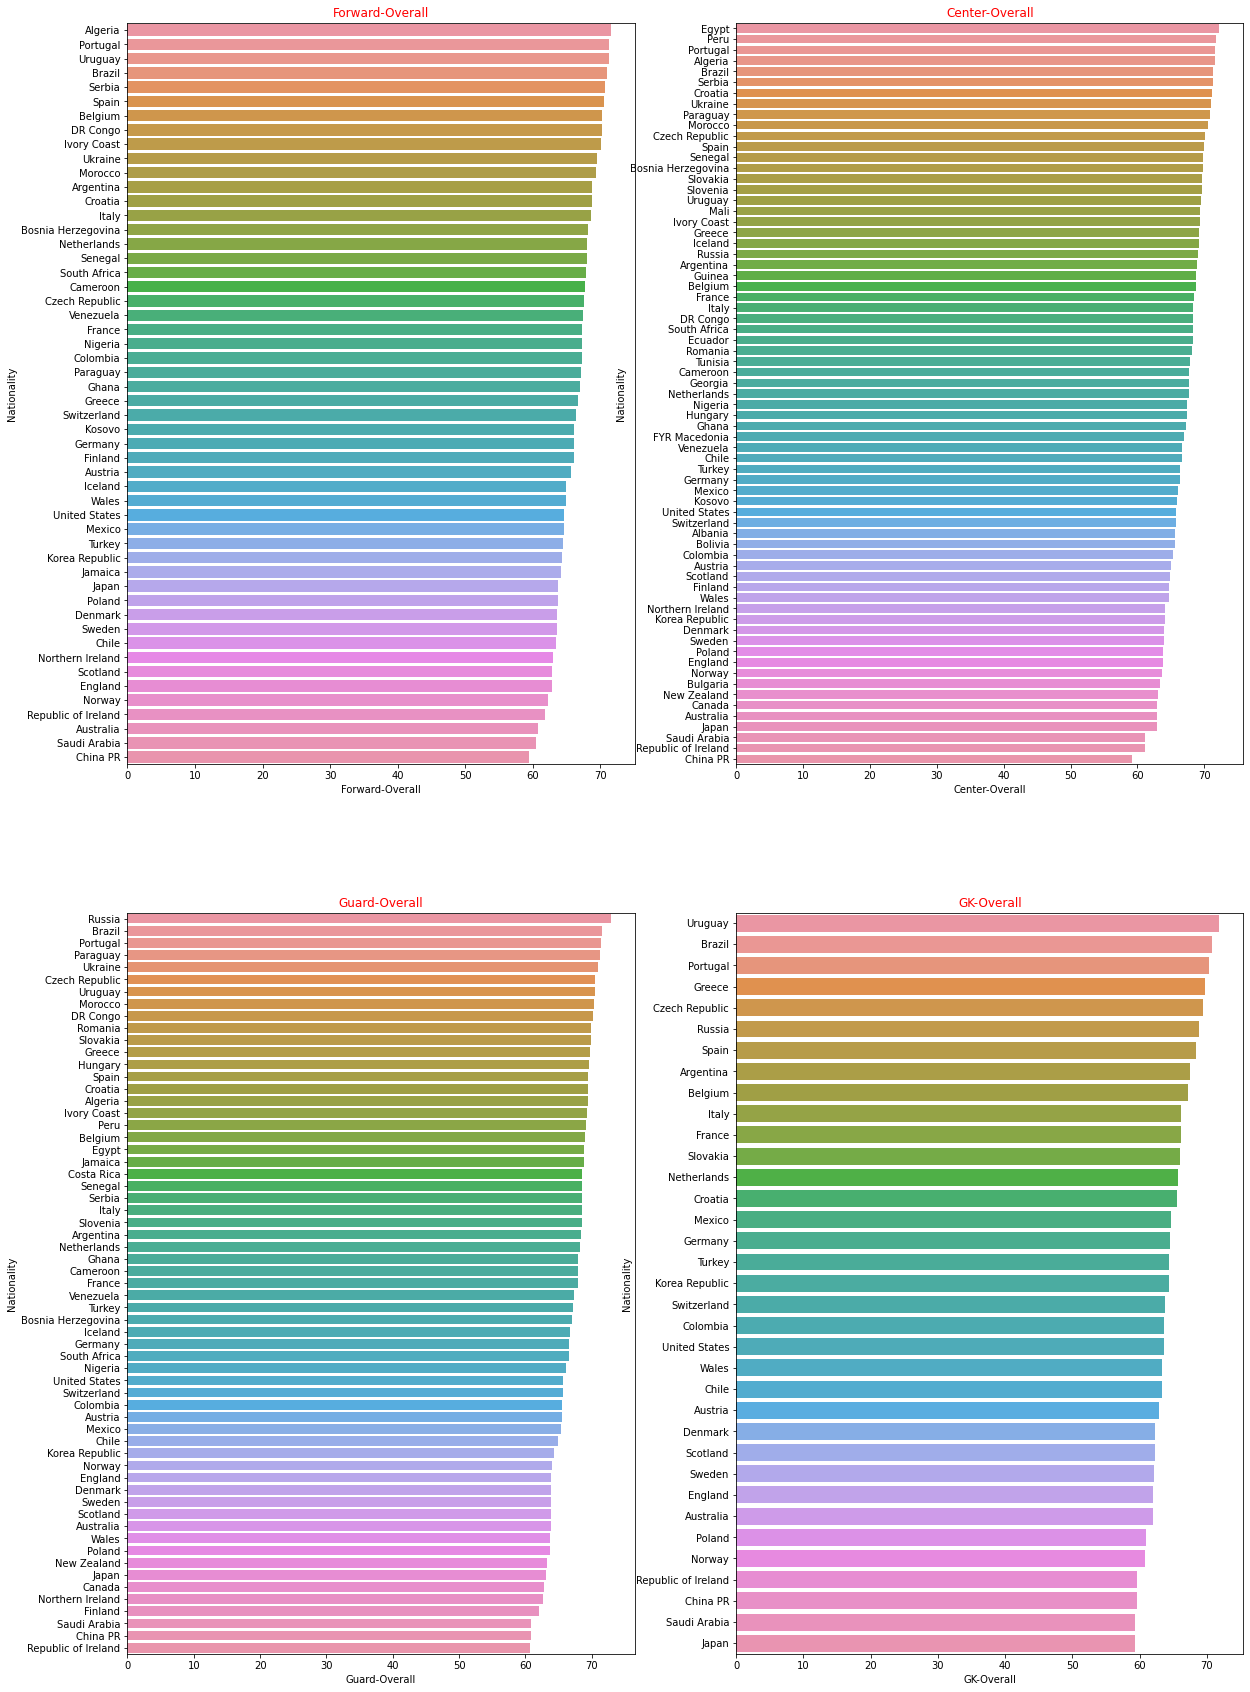

In [29]:
fig, ax = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(20, 30))
sns.barplot(forwards['Forward-Overall'],
            forwards.index, orient='h', ax=ax[0, 0])
sns.barplot(centers['Center-Overall'], centers.index, orient='h', ax=ax[0, 1])
sns.barplot(guards['Guard-Overall'], guards.index, orient='h', ax=ax[1, 0])
sns.barplot(gks['GK-Overall'], gks.index, orient='h', ax=ax[1, 1])

ax[0, 0].set_title('Forward-Overall', color='r')
ax[0, 1].set_title('Center-Overall', color='r')
ax[1, 0].set_title('Guard-Overall', color='r')
ax[1, 1].set_title('GK-Overall', color='r')
plt.show()

Task 7.每个位置的最好的球员
====

In [30]:
data['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [31]:
new_data = data.copy()
new_data['Position'] = new_data['Position'].fillna('NAN')

<AxesSubplot:xlabel='Position', ylabel='count'>

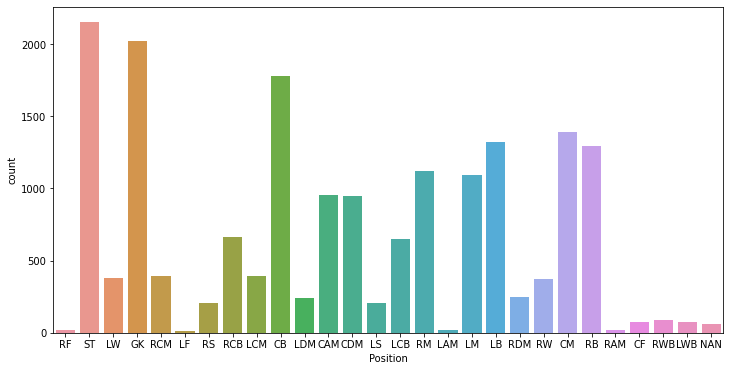

In [32]:
fig = plt.figure(figsize=(12,6))
sns.countplot(new_data['Position'])

In [33]:
new_data = new_data.drop(columns=new_data.columns[[0,1,4,5,6,9,10,12,13,14,15,16,18,19,20,*(list(range(22,54))),88]])
new_data.columns

Index(['Name', 'Age', 'Overall', 'Potential', 'Value', 'Skill Moves',
       'Position', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [34]:
new_data.head(5).T

,0,1,2,3,4
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne
Age,31,33,26,27,27
Overall,94,94,92,91,91
Potential,94,94,93,93,92
Value,€110.5M,€77M,€118.5M,€72M,€102M
Skill Moves,4,5,5,1,4
Position,RF,ST,LW,GK,RCM
Crossing,84,84,79,17,93
Finishing,95,94,87,13,82
HeadingAccuracy,70,89,62,21,55


In [35]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             18207 non-null  object 
 1   Age              18207 non-null  int64  
 2   Overall          18207 non-null  int64  
 3   Potential        18207 non-null  int64  
 4   Value            18207 non-null  object 
 5   Skill Moves      18159 non-null  float64
 6   Position         18207 non-null  object 
 7   Crossing         18159 non-null  float64
 8   Finishing        18159 non-null  float64
 9   HeadingAccuracy  18159 non-null  float64
 10  ShortPassing     18159 non-null  float64
 11  Volleys          18159 non-null  float64
 12  Dribbling        18159 non-null  float64
 13  Curve            18159 non-null  float64
 14  FKAccuracy       18159 non-null  float64
 15  LongPassing      18159 non-null  float64
 16  BallControl      18159 non-null  float64
 17  Acceleration

In [36]:
new_data['Value'].replace('[€MK]', '', inplace=True, regex=True)
new_data['Value'] = new_data['Value'].astype(float)

new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             18207 non-null  object 
 1   Age              18207 non-null  int64  
 2   Overall          18207 non-null  int64  
 3   Potential        18207 non-null  int64  
 4   Value            18207 non-null  float64
 5   Skill Moves      18159 non-null  float64
 6   Position         18207 non-null  object 
 7   Crossing         18159 non-null  float64
 8   Finishing        18159 non-null  float64
 9   HeadingAccuracy  18159 non-null  float64
 10  ShortPassing     18159 non-null  float64
 11  Volleys          18159 non-null  float64
 12  Dribbling        18159 non-null  float64
 13  Curve            18159 non-null  float64
 14  FKAccuracy       18159 non-null  float64
 15  LongPassing      18159 non-null  float64
 16  BallControl      18159 non-null  float64
 17  Acceleration

In [37]:
# fig = plt.figure(figsize=(16,14))
# sns.heatmap(new_data.corr(),cmap="rainbow",annot=True,fmt=".1f")

In [38]:
'''
    评价标准1. 根据不同能力评价: 射门、过人、带球、防守、体质、速度
'''

attribute = {
'Pace': ['Acceleration', 'SprintSpeed'],
'Shooting': ['Finishing', 'ShotPower', 'LongShots', 'Positioning', 'Volleys'],
'Passing': ['ShortPassing', 'LongPassing', 'Crossing', 'Curve', 'Vision'],
'Dribbling': ['Agility', 'Balance', 'BallControl', 'Composure', 'Dribbling', 'Reactions'],
'Defending': ['Interceptions', 'Marking', 'StandingTackle', 'SlidingTackle'],
'Physical': ['Aggression', 'Jumping', 'Stamina', 'Strength']
}

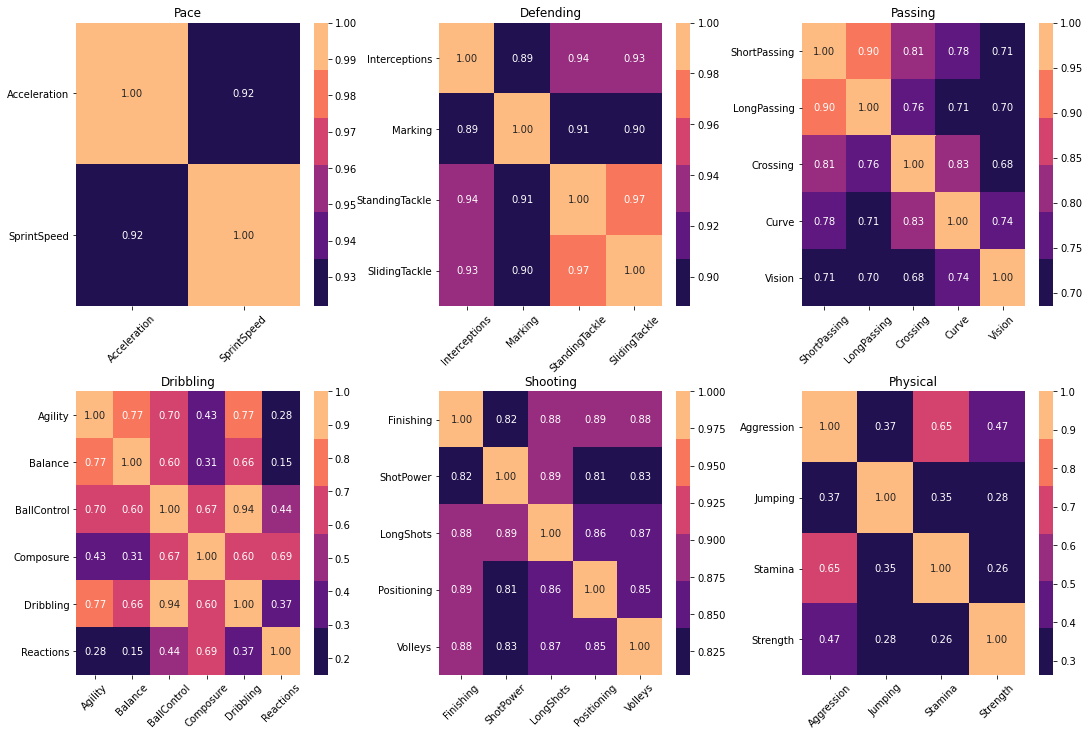

In [39]:
fig, ax = plt.subplots(2,3,figsize=(18,12))
cmap = sns.color_palette("magma")
i = 0
plt.subplots_adjust(wspace=0.3,hspace=0.3)
for attr in attribute:
    corr = new_data[attribute[attr]].corr()
    sns.heatmap(corr,cmap=cmap,annot=True,fmt=".2f",ax=ax[i%2,i%3])
    ax[i%2,i%3].set_title(attr)
    ax[i%2,i%3].tick_params(axis='x',labelrotation=45)
    ax[i%2,i%3].tick_params(axis='y',labelrotation=0)
    i += 1
plt.show()

Pace: 


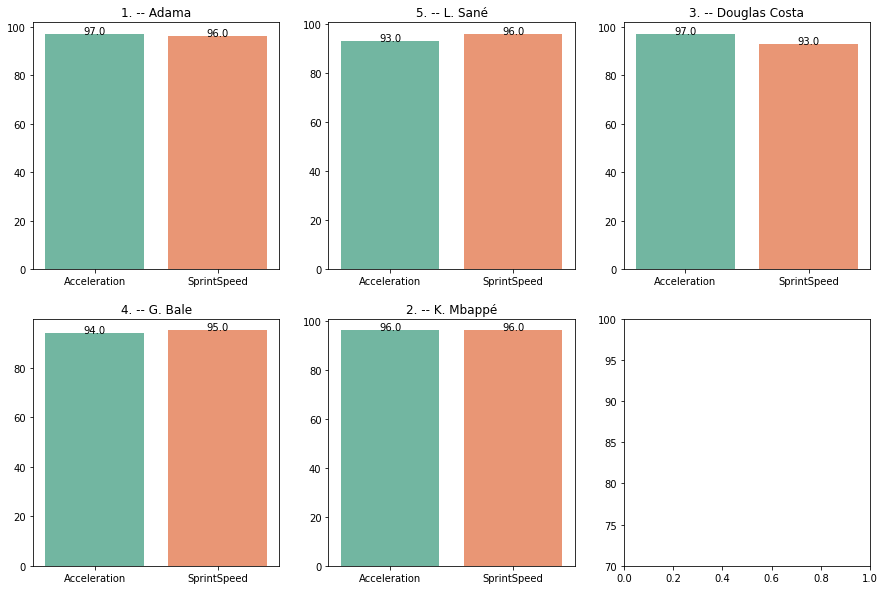

Shooting: 


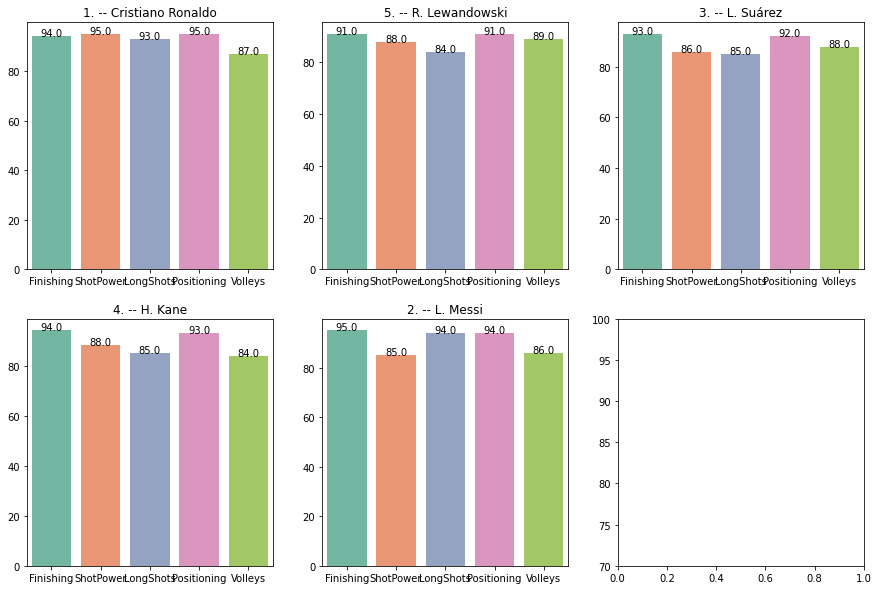

Passing: 


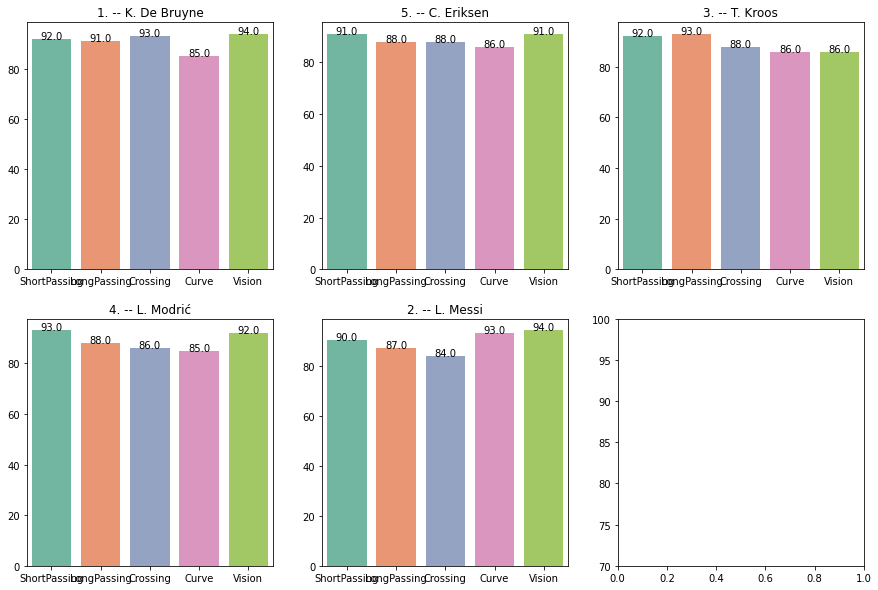

Dribbling: 


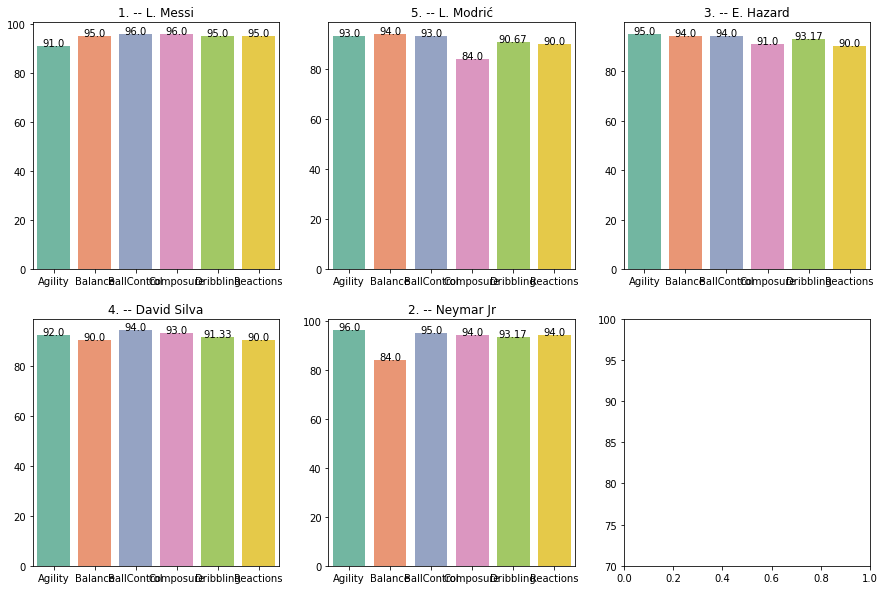

Defending: 


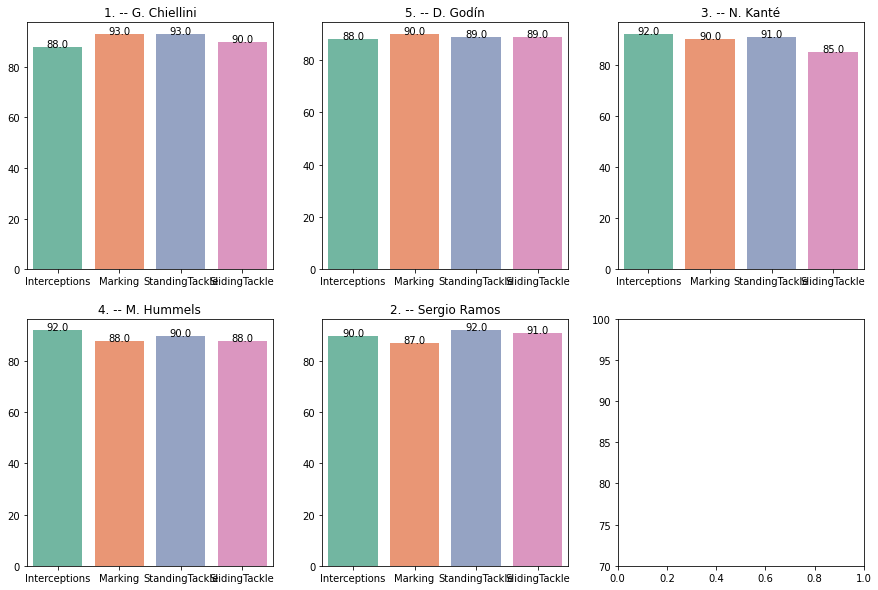

Physical: 


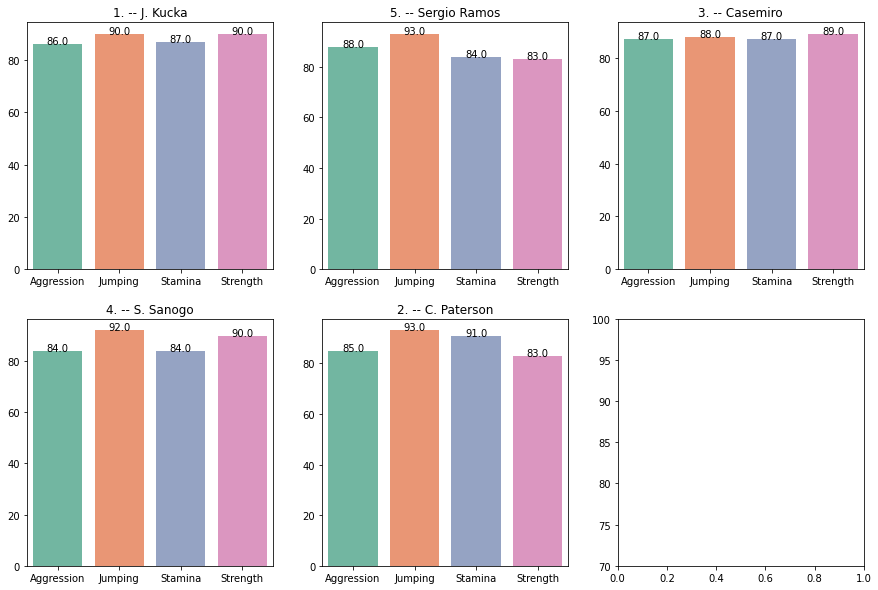

In [40]:
for attr in attribute:
    new_data[attr] = new_data[attribute[attr]].mean(axis=1)
for attr in attribute:
    fig, ax = plt.subplots(2,3,figsize=(15,10))
    i = 0
    for idx, row in new_data.nlargest(5, attr).iterrows():
        p = sns.barplot(row[attribute[attr]].index, row[attribute[attr]].values,ax=ax[i%2,i%3],palette='Set2')
        ax[i%2,i%3].set_title(str(i+1)+'. -- '+row['Name'])
        plt.ylim(70,100)
        j = 0
        for idx2, val in row[attribute[attr]].iteritems():
            p.text(j, val, round(val,2),color='black',ha='center')
            j += 1
        i += 1
    print(f"===============================================================\n{attr}: ")
    plt.show()

In [41]:
idxs = ['Pace','Shooting','Passing','Dribbling','Defending','Physical']
for idx in idxs:
    print(f"【{idx}】:\n{new_data.nlargest(5,idx).Name}\n")

【Pace】:
1968            Adama
25          K. Mbappé
65      Douglas Costa
36            G. Bale
55            L. Sané
Name: Name, dtype: object

【Shooting】:
1     Cristiano Ronaldo
0              L. Messi
7             L. Suárez
16              H. Kane
10       R. Lewandowski
Name: Name, dtype: object

【Passing】:
4     K. De Bruyne
0         L. Messi
11        T. Kroos
6        L. Modrić
31      C. Eriksen
Name: Name, dtype: object

【Dribbling】:
0        L. Messi
2       Neymar Jr
5       E. Hazard
13    David Silva
6       L. Modrić
Name: Name, dtype: object

【Defending】:
24    G. Chiellini
8     Sergio Ramos
14        N. Kanté
34      M. Hummels
12        D. Godín
Name: Name, dtype: object

【Physical】:
1079        J. Kucka
4080     C. Paterson
27          Casemiro
1394       S. Sanogo
8       Sergio Ramos
Name: Name, dtype: object



In [42]:
'''
    评价标准2. 根据不同位置对运动员的各项数据要求评价
'''

player_attribute = (
    'Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties'
)

for i, val in new_data.groupby(new_data['Position'])[player_attribute].mean().iterrows():
    print(f"{i} : {tuple(val.nlargest(4).index)}")

CAM : ('Balance', 'Agility', 'Acceleration', 'BallControl')
CB : ('Jumping', 'Aggression', 'HeadingAccuracy', 'Marking')
CDM : ('Aggression', 'Jumping', 'Balance', 'BallControl')
CF : ('Agility', 'Balance', 'Acceleration', 'Dribbling')
CM : ('Balance', 'Agility', 'Acceleration', 'BallControl')
GK : ('GKReflexes', 'GKDiving', 'GKPositioning', 'GKHandling')
LAM : ('Agility', 'Balance', 'Acceleration', 'BallControl')
LB : ('Acceleration', 'Balance', 'Agility', 'Jumping')
LCB : ('Jumping', 'Aggression', 'HeadingAccuracy', 'Marking')
LCM : ('Balance', 'Agility', 'BallControl', 'Dribbling')
LDM : ('Aggression', 'BallControl', 'LongPassing', 'Balance')
LF : ('Balance', 'Agility', 'Acceleration', 'BallControl')
LM : ('Acceleration', 'Agility', 'Balance', 'Dribbling')
LS : ('Acceleration', 'Agility', 'Finishing', 'Jumping')
LW : ('Acceleration', 'Agility', 'Balance', 'Dribbling')
LWB : ('Acceleration', 'Agility', 'Balance', 'Jumping')
NAN : ('Balance', 'Agility', 'Acceleration', 'Jumping')
RAM 

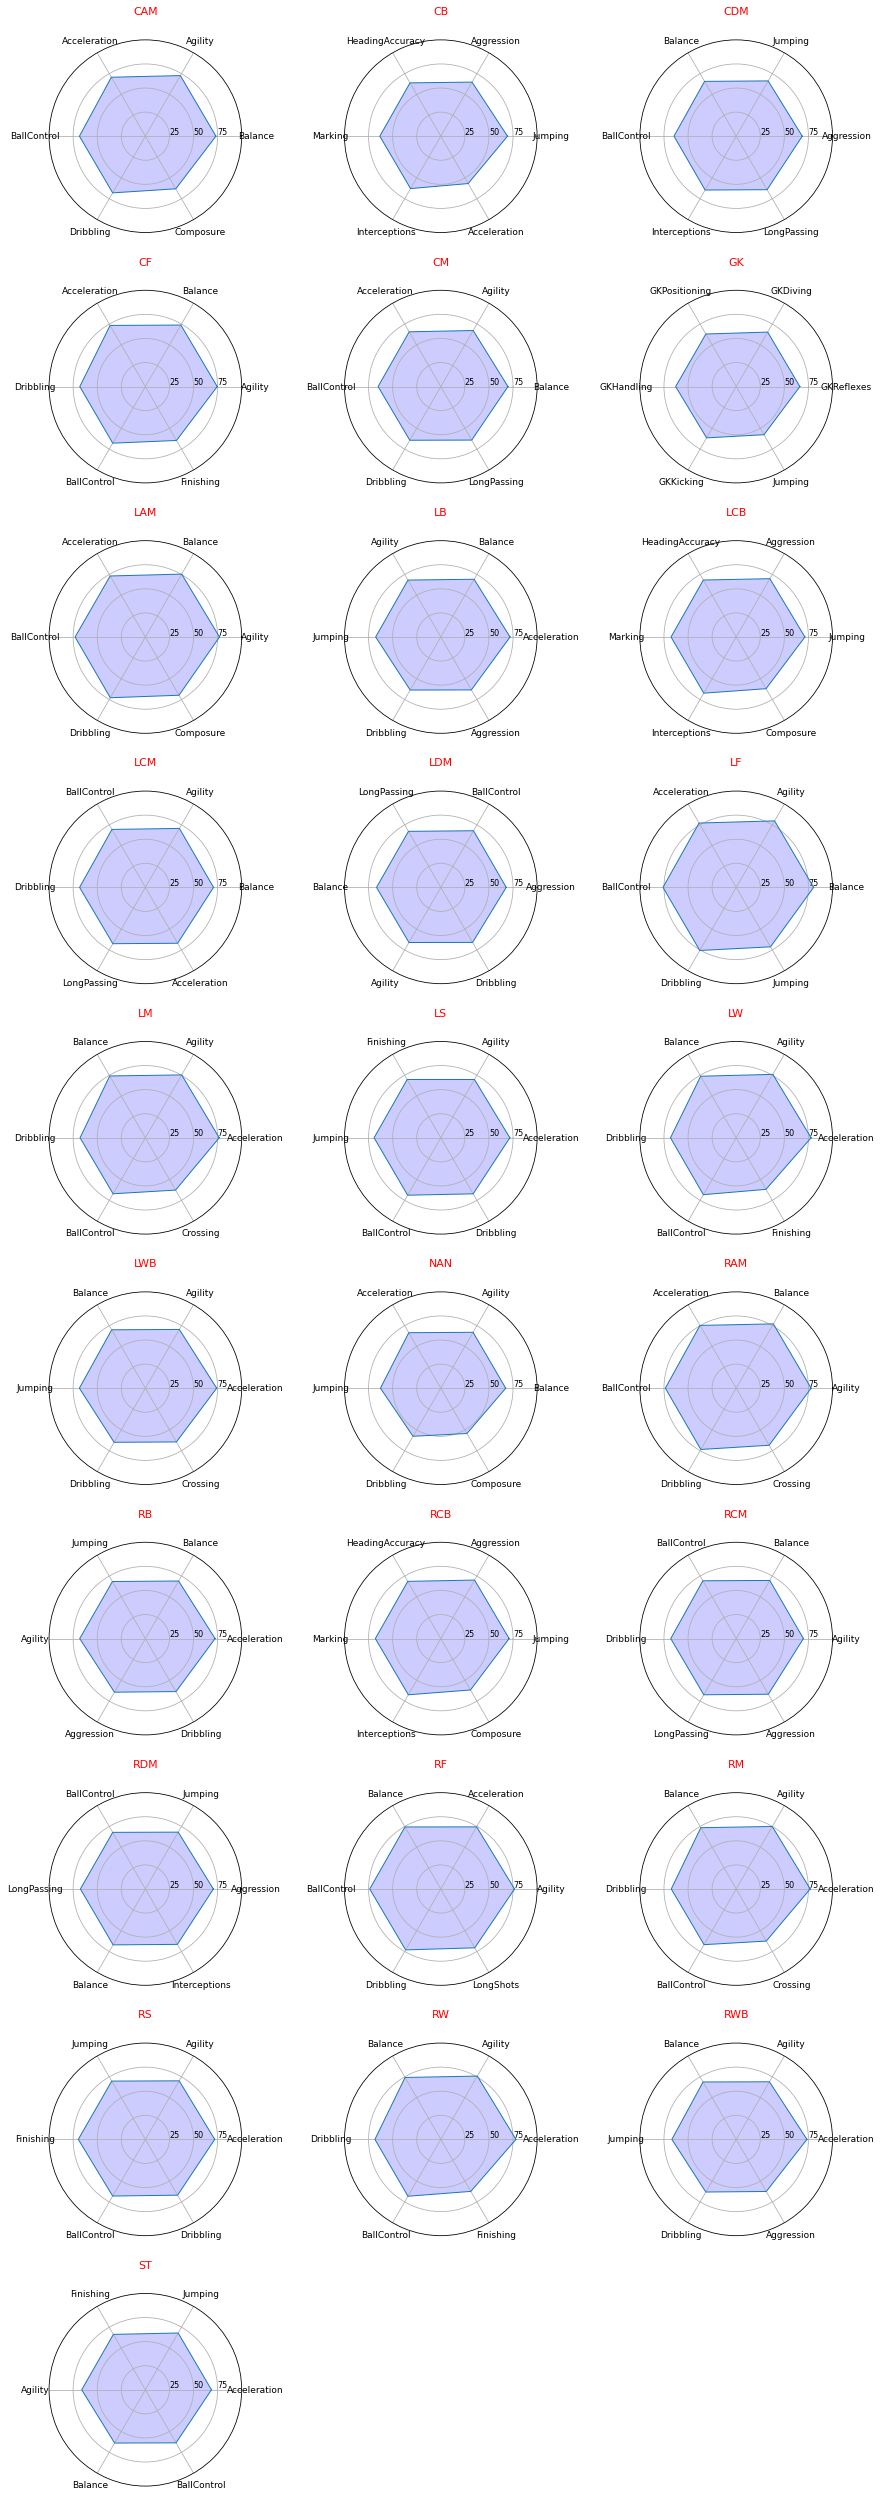

In [43]:
fig = plt.figure(figsize=(15,45))
idx = 1
for pos, attr in new_data.groupby(new_data['Position'])[player_attribute].mean().iterrows():
    top = dict(attr.nlargest(6))
    categories = top.keys()
    N = len(categories)
    val = list(top.values())
    val += val[:1]
    
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(10, 3, idx, polar=True)
    
    plt.xticks(angles[:-1], categories, color='black',size=9)
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"],color="black",size=8)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace=0.3)
    
    ax.plot(angles, val, linewidth=1, linestyle='solid')
    ax.fill(angles, val, 'b', alpha=0.2)
    plt.title(pos, size=11, y=1.1, color='red')
    
    idx += 1 

CAM: 


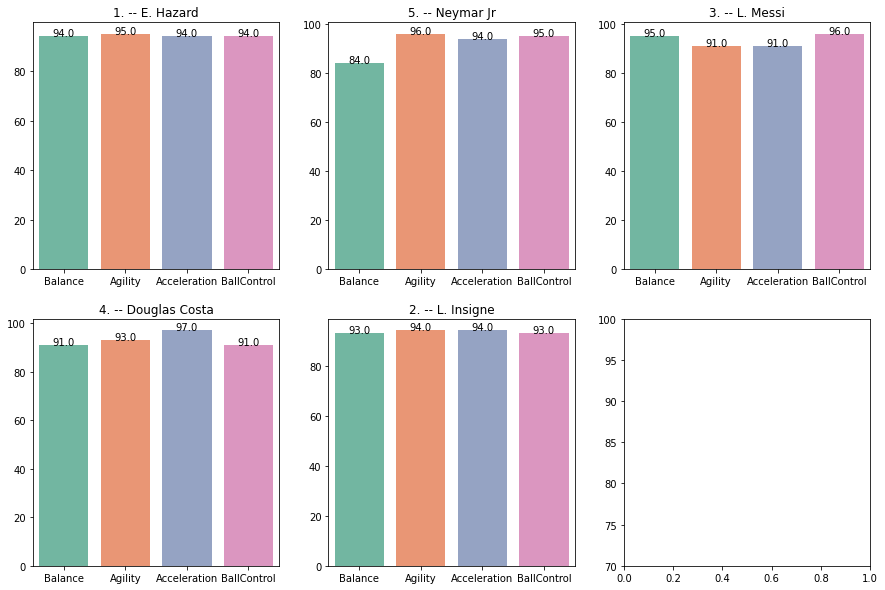

CB: 


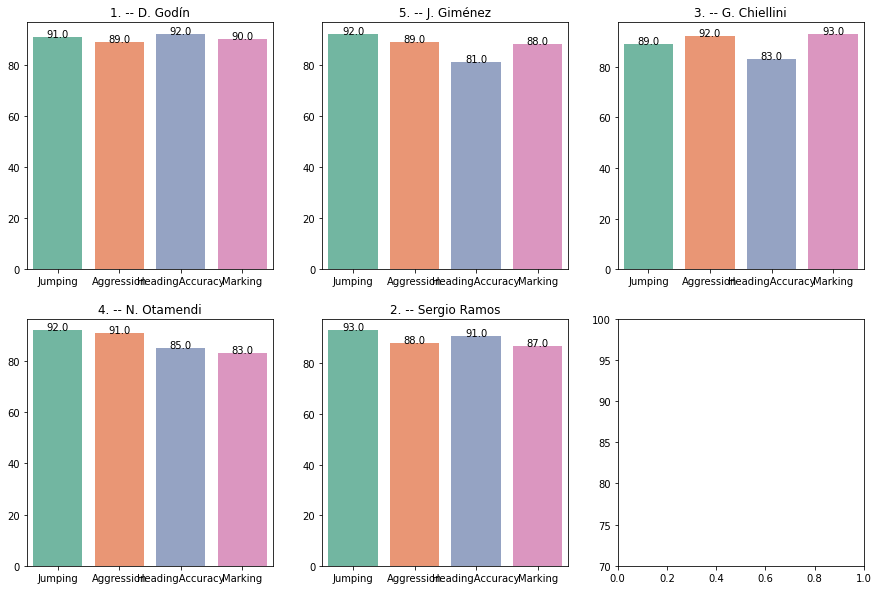

CDM: 


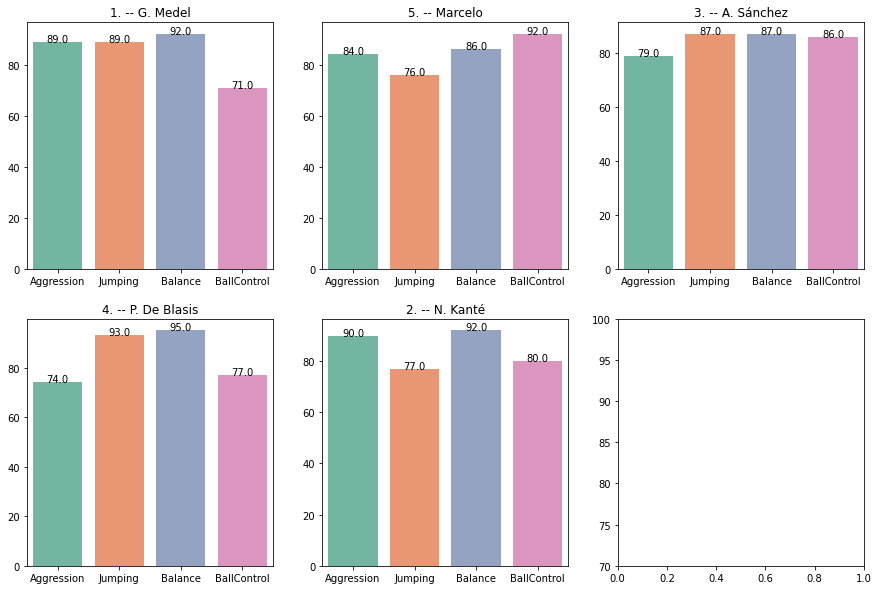

CF: 


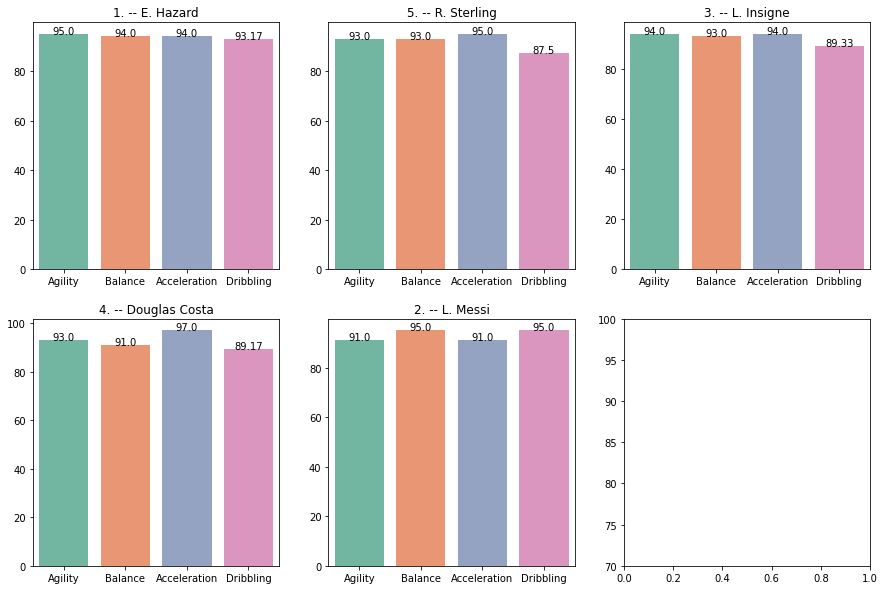

CM: 


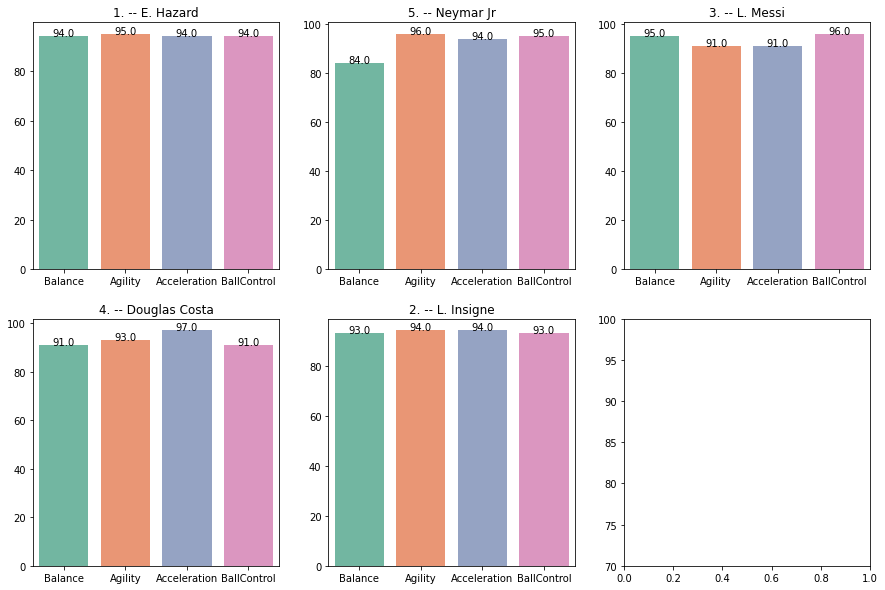

GK: 


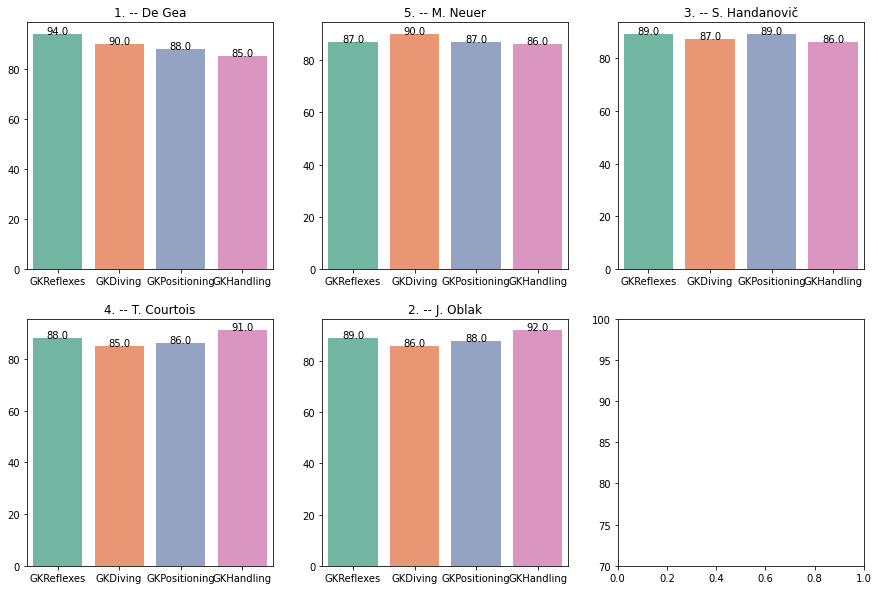

LAM: 


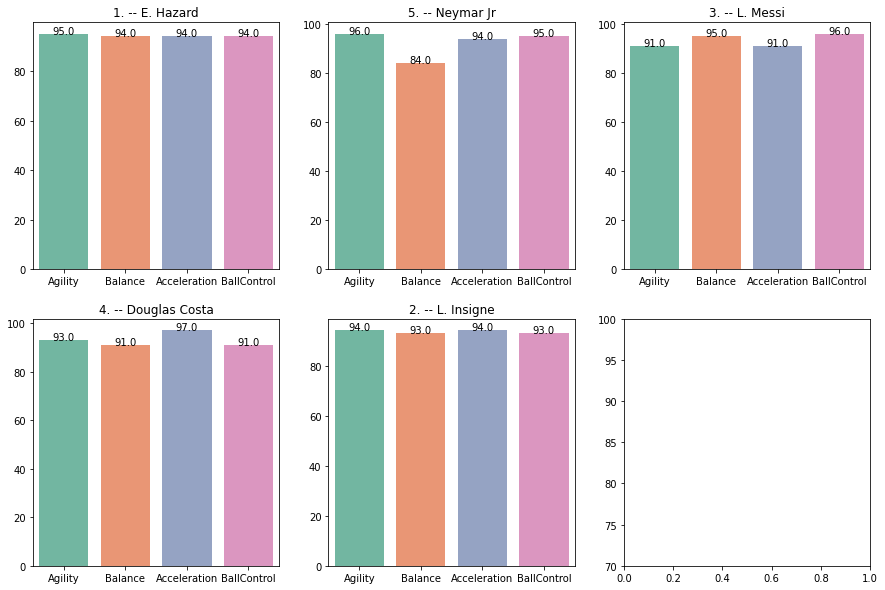

LB: 


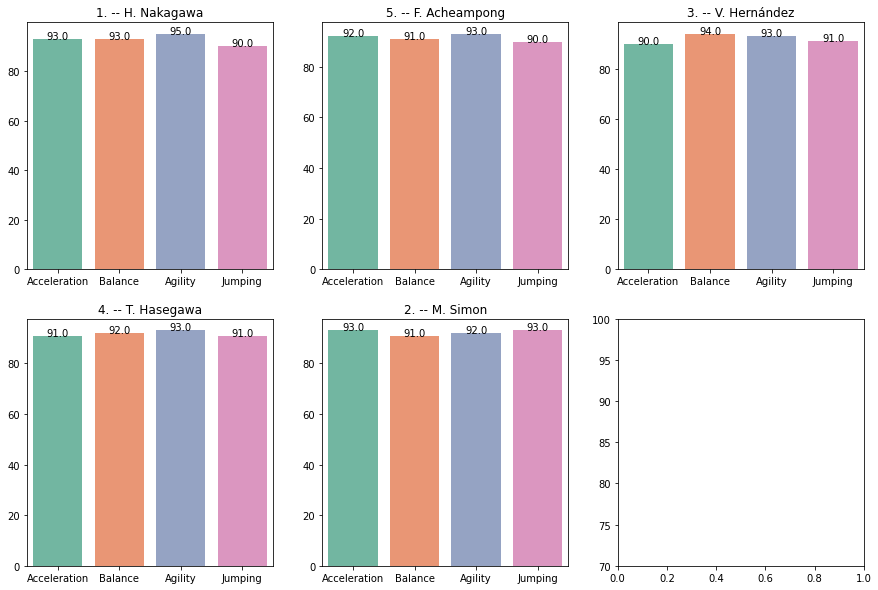

LCB: 


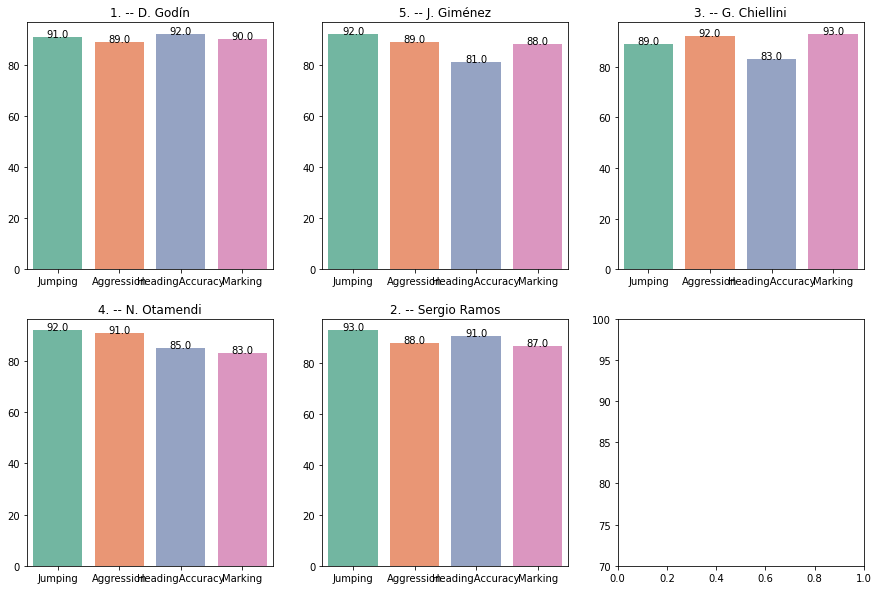

LCM: 


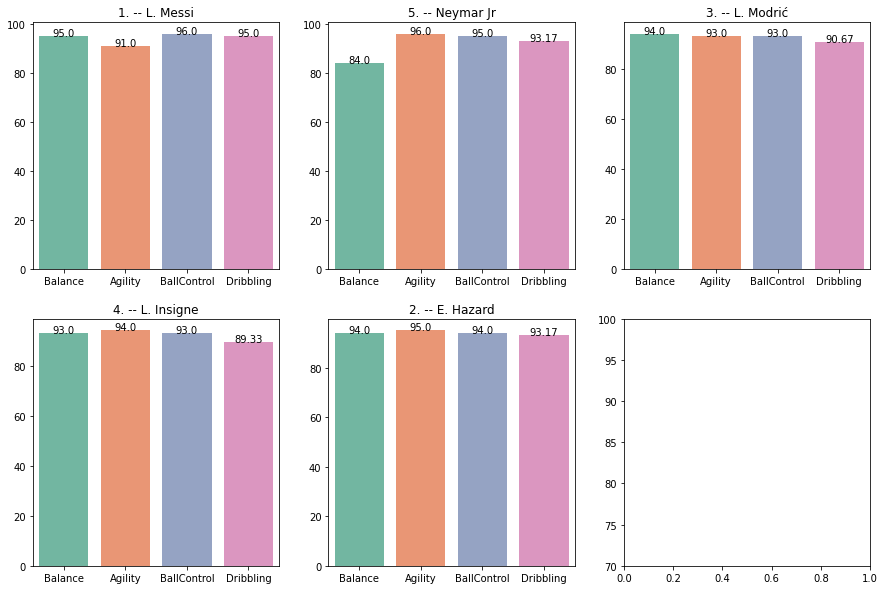

LDM: 


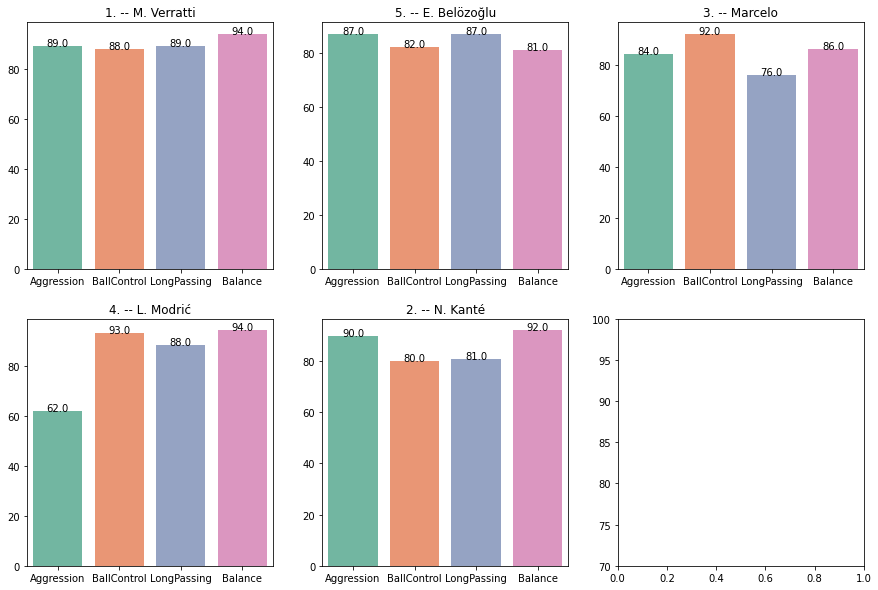

LF: 


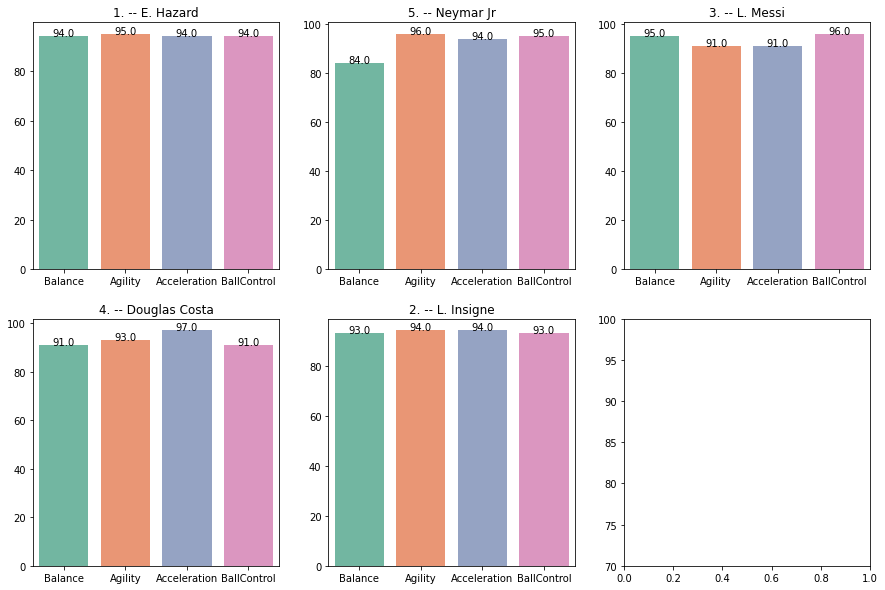

LM: 


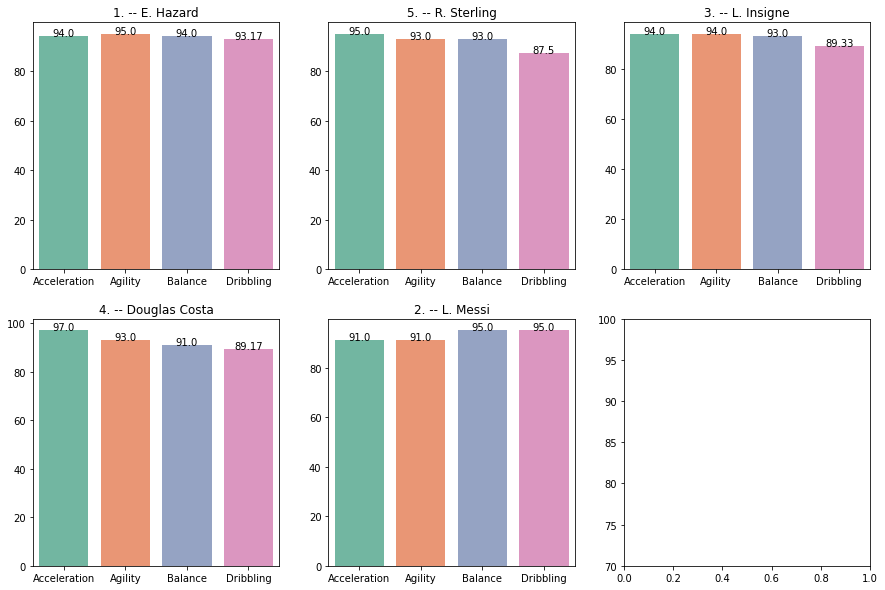

LS: 


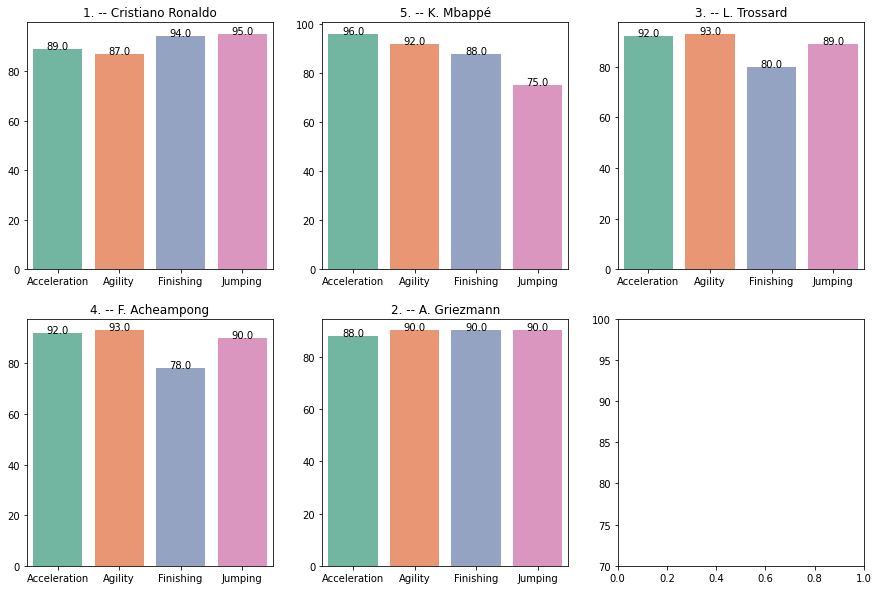

LW: 


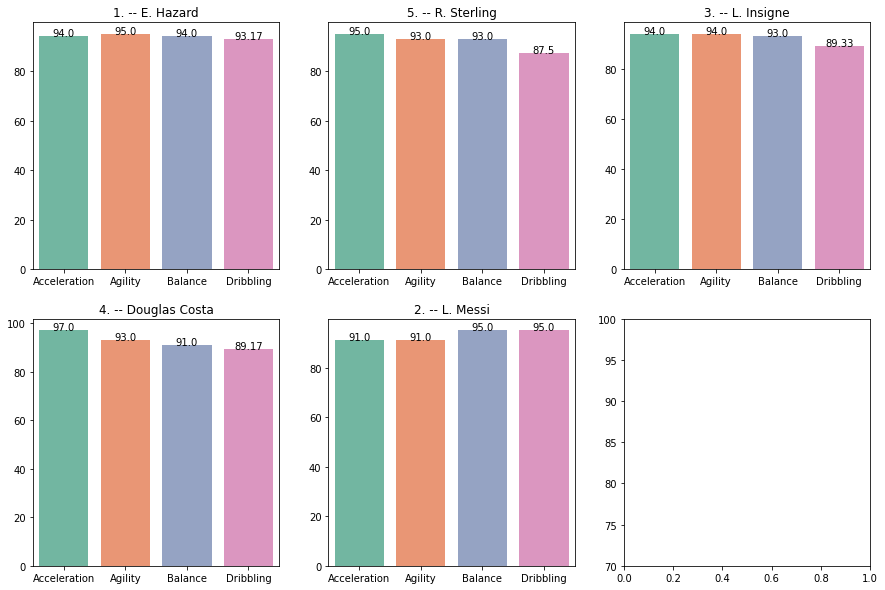

LWB: 


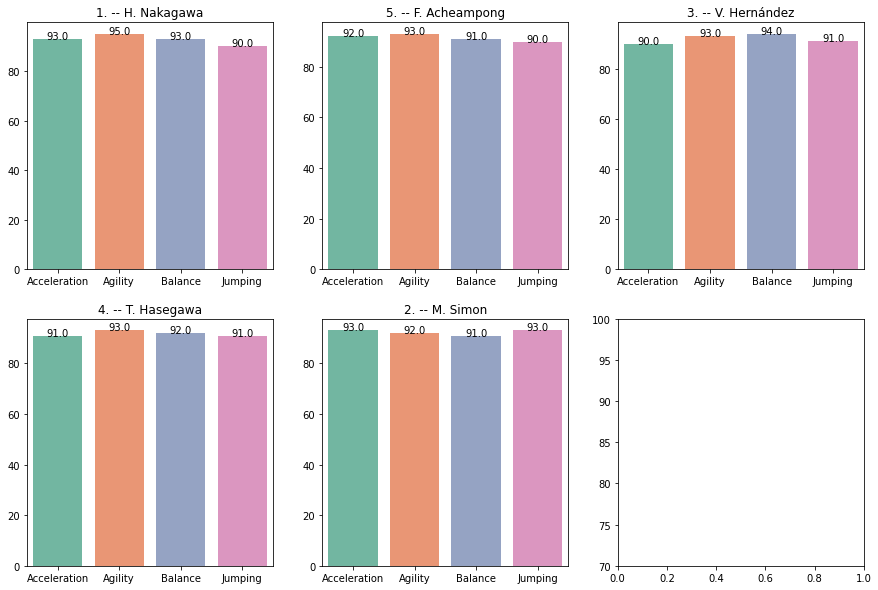

NAN: 


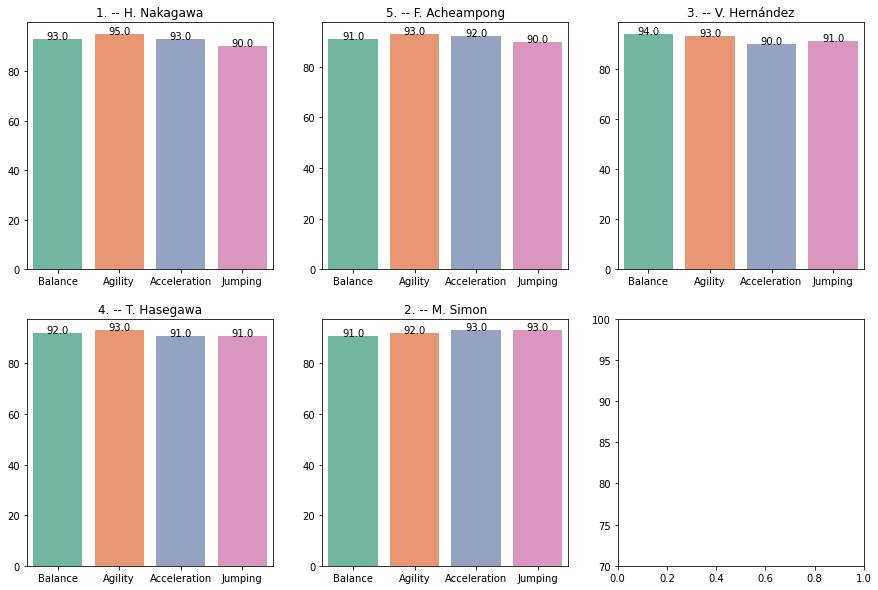

RAM: 


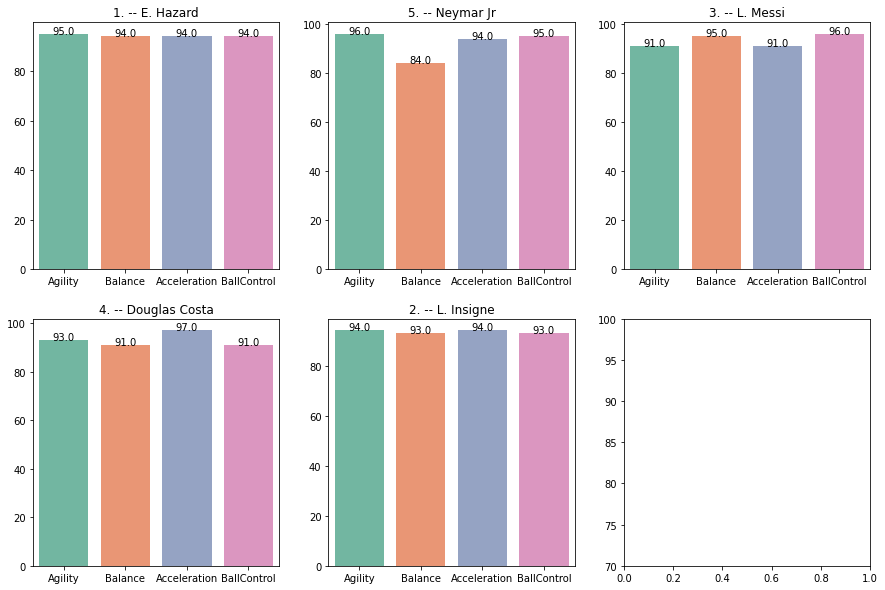

RB: 


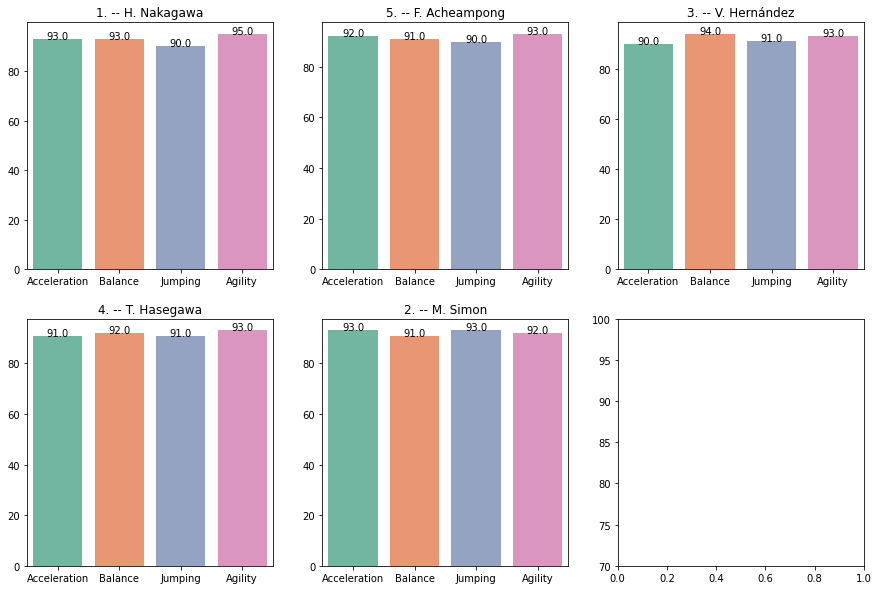

RCB: 


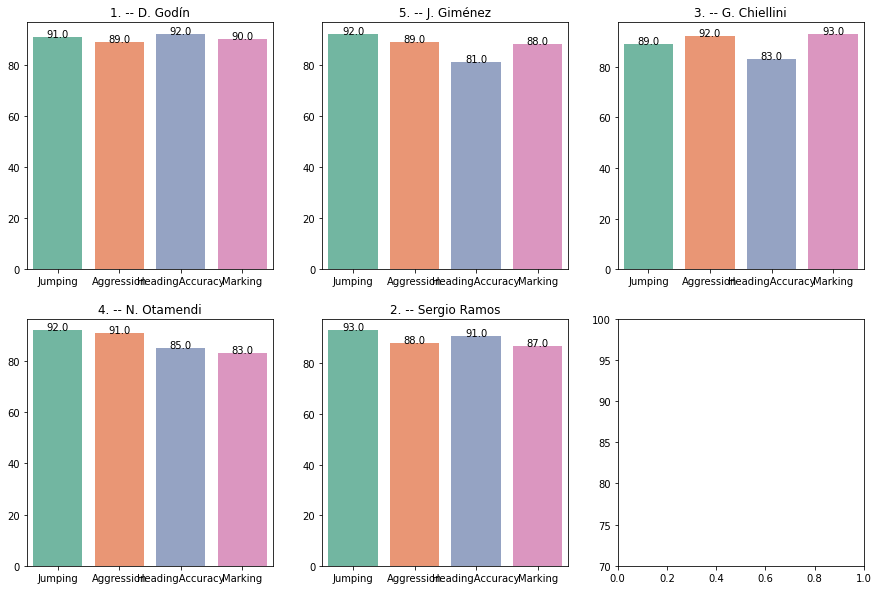

RCM: 


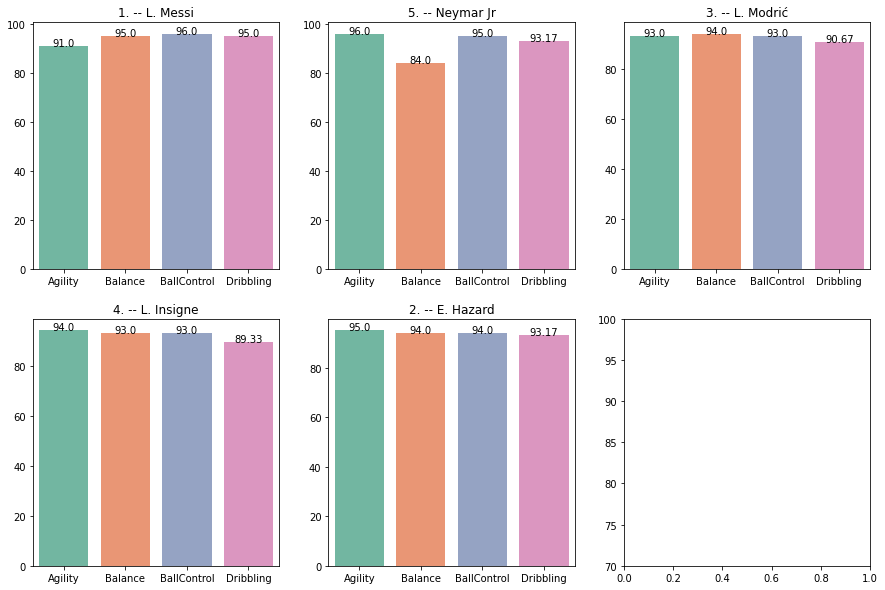

RDM: 


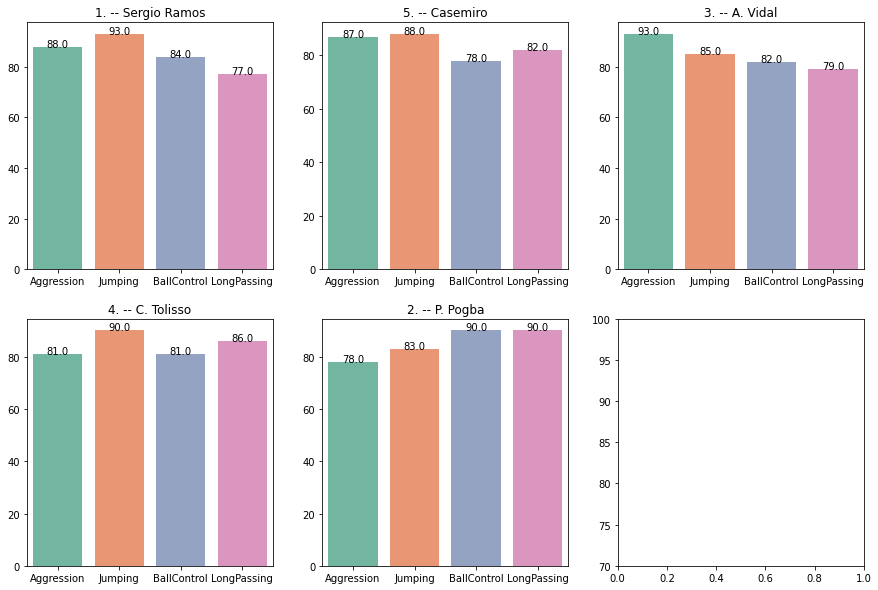

RF: 


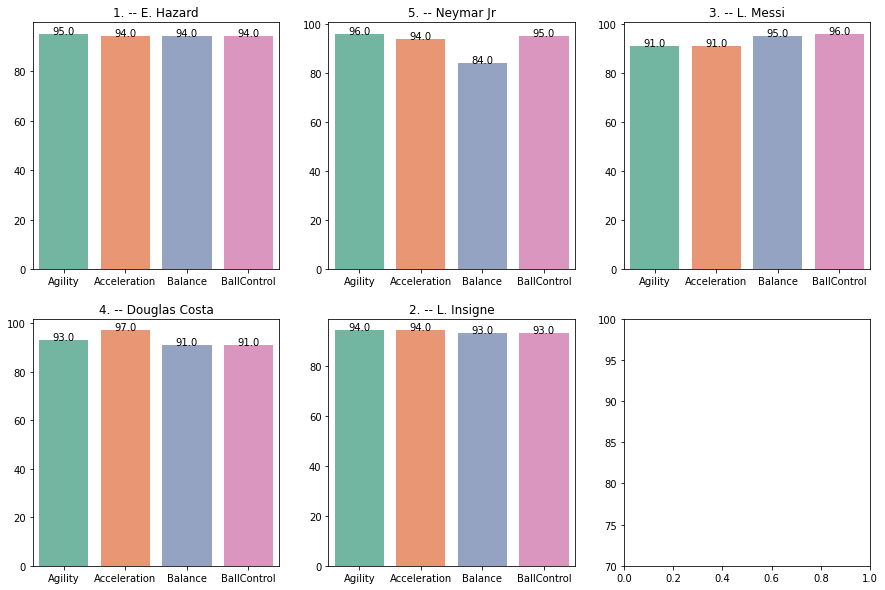

RM: 


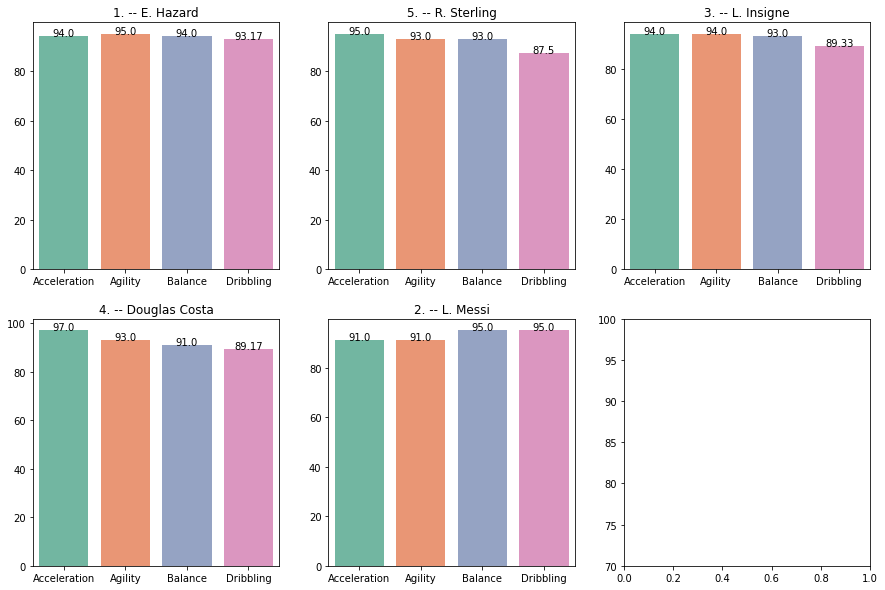

RS: 


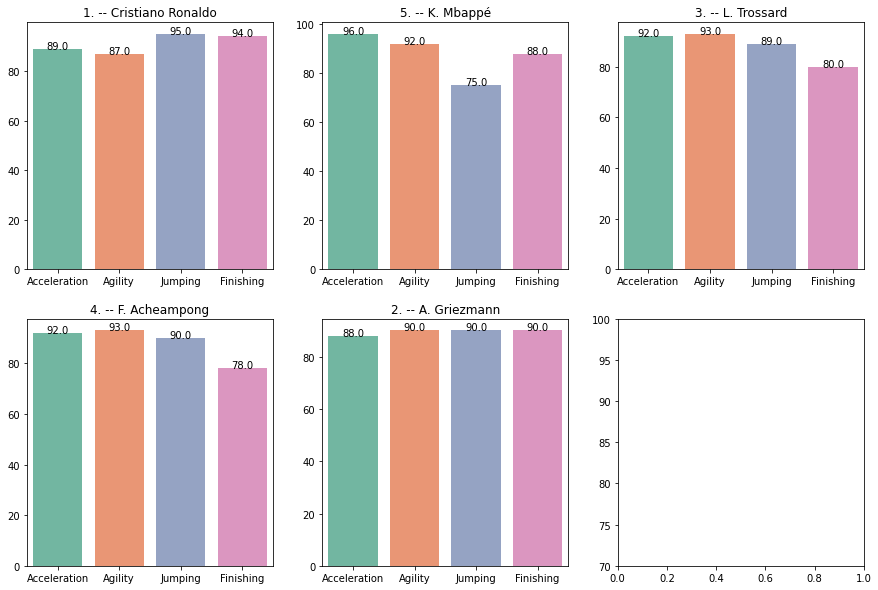

RW: 


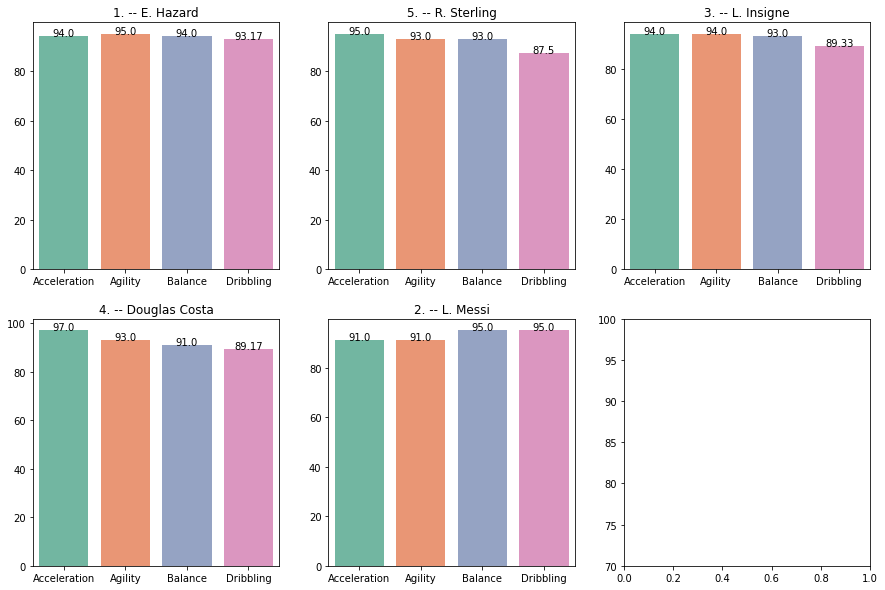

RWB: 


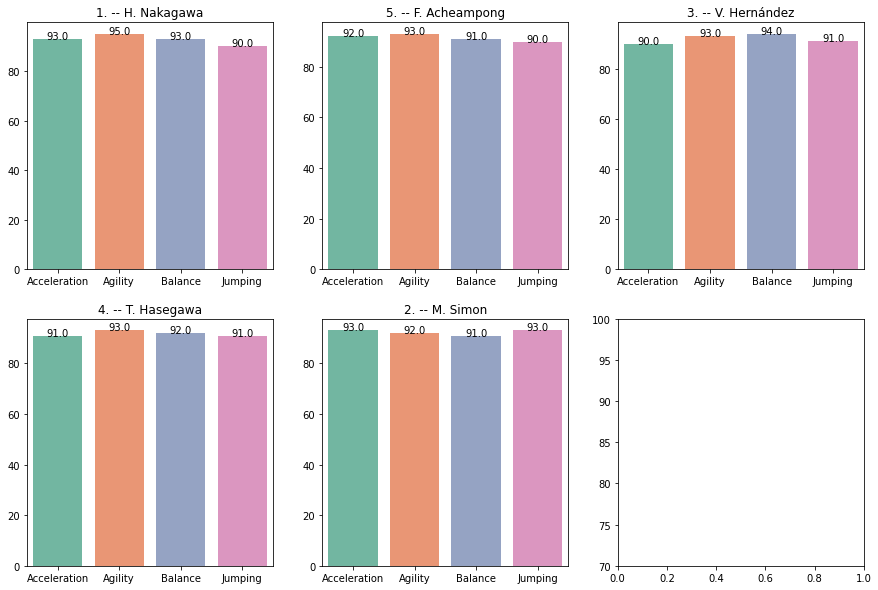

ST: 


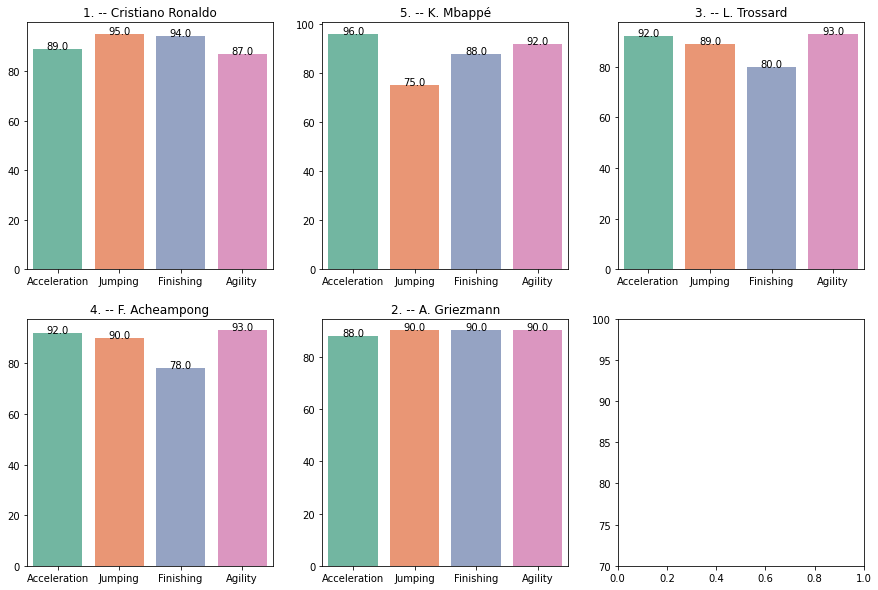

In [44]:
attribute = {
    'CAM': ['Balance', 'Agility', 'Acceleration', 'BallControl'],
    'CB': ['Jumping', 'Aggression', 'HeadingAccuracy', 'Marking'],
    'CDM': ['Aggression', 'Jumping', 'Balance', 'BallControl'],
    'CF': ['Agility', 'Balance', 'Acceleration', 'Dribbling'],
    'CM': ['Balance', 'Agility', 'Acceleration', 'BallControl'],
    'GK': ['GKReflexes', 'GKDiving', 'GKPositioning', 'GKHandling'],
    'LAM': ['Agility', 'Balance', 'Acceleration', 'BallControl'],
    'LB': ['Acceleration', 'Balance', 'Agility', 'Jumping'],
    'LCB': ['Jumping', 'Aggression', 'HeadingAccuracy', 'Marking'],
    'LCM': ['Balance', 'Agility', 'BallControl', 'Dribbling'],
    'LDM': ['Aggression', 'BallControl', 'LongPassing', 'Balance'],
    'LF': ['Balance', 'Agility', 'Acceleration', 'BallControl'],
    'LM': ['Acceleration', 'Agility', 'Balance', 'Dribbling'],
    'LS': ['Acceleration', 'Agility', 'Finishing', 'Jumping'],
    'LW': ['Acceleration', 'Agility', 'Balance', 'Dribbling'],
    'LWB': ['Acceleration', 'Agility', 'Balance', 'Jumping'],
    'NAN': ['Balance', 'Agility', 'Acceleration', 'Jumping'],
    'RAM': ['Agility', 'Balance', 'Acceleration', 'BallControl'],
    'RB': ['Acceleration', 'Balance', 'Jumping', 'Agility'],
    'RCB': ['Jumping', 'Aggression', 'HeadingAccuracy', 'Marking'],
    'RCM': ['Agility', 'Balance', 'BallControl', 'Dribbling'],
    'RDM': ['Aggression', 'Jumping', 'BallControl', 'LongPassing'],
    'RF': ['Agility', 'Acceleration', 'Balance', 'BallControl'],
    'RM': ['Acceleration', 'Agility', 'Balance', 'Dribbling'],
    'RS': ['Acceleration', 'Agility', 'Jumping', 'Finishing'],
    'RW': ['Acceleration', 'Agility', 'Balance', 'Dribbling'],
    'RWB': ['Acceleration', 'Agility', 'Balance', 'Jumping'],
    'ST': ['Acceleration', 'Jumping', 'Finishing', 'Agility']
}


for attr in attribute:
    new_data[attr] = new_data[attribute[attr]].mean(axis=1)
for attr in attribute:
    fig, ax = plt.subplots(2,3,figsize=(15,10))
    i = 0
    for idx, row in new_data.nlargest(5, attr).iterrows():
        p = sns.barplot(row[attribute[attr]].index, row[attribute[attr]].values,ax=ax[i%2,i%3],palette='Set2')
        ax[i%2,i%3].set_title(str(i+1)+'. -- '+row['Name'])
        plt.ylim(70,100)
        j = 0
        for idx2, val in row[attribute[attr]].iteritems():
            p.text(j, val, round(val,2),color='black',ha='center')
            j += 1
        i += 1
    print(f"===============================================================\n{attr}: ")
    plt.show()

In [45]:
idxs = ['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS',
        'LW', 'LWB', 'NAN', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST']
for idx in idxs:
    print(f"【{idx}】:\n{new_data.nlargest(5,idx).Name}\n")

【CAM】:
5         E. Hazard
29       L. Insigne
0          L. Messi
65    Douglas Costa
2         Neymar Jr
Name: Name, dtype: object

【CB】:
12         D. Godín
8      Sergio Ramos
24     G. Chiellini
89      N. Otamendi
111      J. Giménez
Name: Name, dtype: object

【CDM】:
369         G. Medel
14          N. Kanté
93        A. Sánchez
1581    P. De Blasis
35           Marcelo
Name: Name, dtype: object

【CF】:
5         E. Hazard
0          L. Messi
29       L. Insigne
65    Douglas Costa
60      R. Sterling
Name: Name, dtype: object

【CM】:
5         E. Hazard
29       L. Insigne
0          L. Messi
65    Douglas Costa
2         Neymar Jr
Name: Name, dtype: object

【GK】:
3            De Gea
9          J. Oblak
40    S. Handanovič
19      T. Courtois
22         M. Neuer
Name: Name, dtype: object

【LAM】:
5         E. Hazard
29       L. Insigne
0          L. Messi
65    Douglas Costa
2         Neymar Jr
Name: Name, dtype: object

【LB】:
6584      H. Nakagawa
1550         M. Simon
1680     V.

In [46]:
'''
    评价标准3. 根据不同位置的职能划分球员类别：进攻、中场、后卫、守门，对其进行评价
'''

map1 = {i : 'ATK' for i in forward}
map2 = {i : 'MID' for i in center}
map3 = {i : 'DF' for i in guard}
map4 = {i : 'GK' for i in gk}
maps = dict(**map1,**map2,**map3,**map4)
new_data['Position'] = new_data['Position'].map(maps)
new_data['Position'].unique()

array(['ATK', 'GK', 'MID', 'DF', nan], dtype=object)

In [47]:
for i, val in new_data.groupby(new_data['Position'])[player_attribute].mean().iterrows():
    print(f"{i} : {tuple(val.nlargest(6).index)}")

ATK : ('Acceleration', 'Agility', 'Balance', 'Jumping', 'Finishing', 'BallControl')
DF : ('Jumping', 'Aggression', 'Acceleration', 'Marking', 'Interceptions', 'Balance')
GK : ('GKReflexes', 'GKDiving', 'GKPositioning', 'GKHandling', 'GKKicking', 'Jumping')
MID : ('Balance', 'Agility', 'Acceleration', 'BallControl', 'Dribbling', 'Jumping')


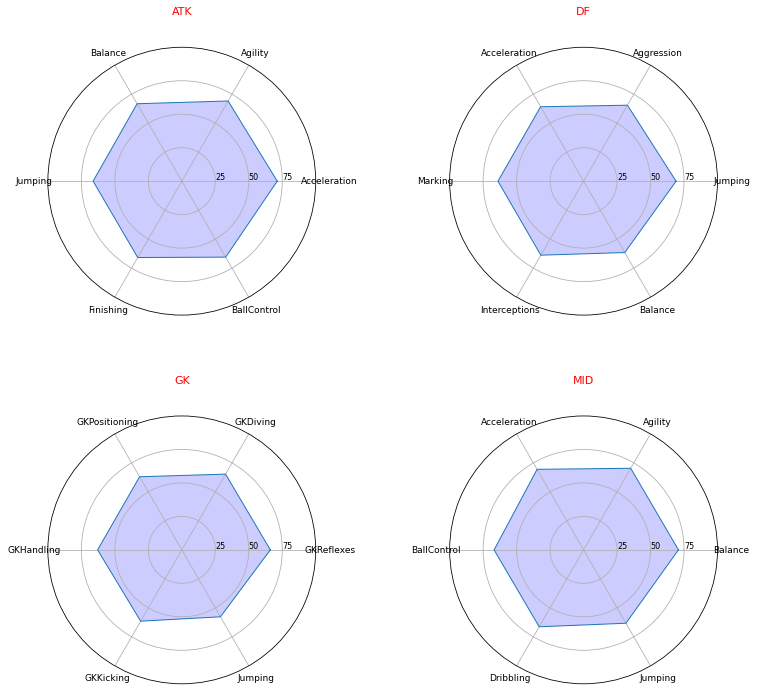

In [48]:
fig = plt.figure(figsize=(12,12))
idx = 1
for pos, attr in new_data.groupby(new_data['Position'])[player_attribute].mean().iterrows():
    top6 = dict(attr.nlargest(6))
    categories = top6.keys()
    N = len(categories)
    val = list(top6.values())
    val += val[:1]
    
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(2, 2, idx, polar=True)
    
    plt.xticks(angles[:-1], categories, color='black',size=9)
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"],color="black",size=8)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace=0.3, wspace=0.5)
    
    ax.plot(angles, val, linewidth=1, linestyle='solid')
    ax.fill(angles, val, 'b', alpha=0.2)
    plt.title(pos, size=11, y=1.1, color='red')
    
    idx += 1 

ATKs: 


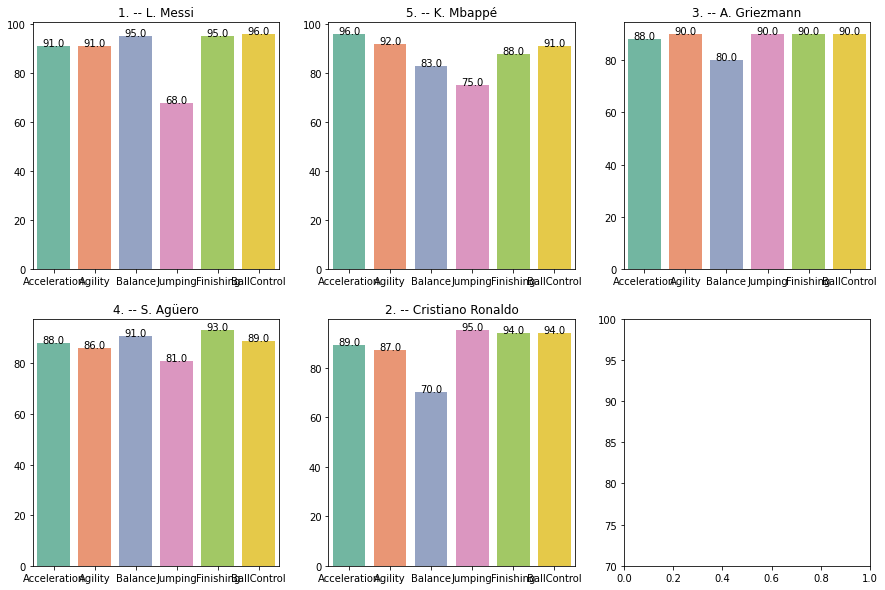

DFs: 


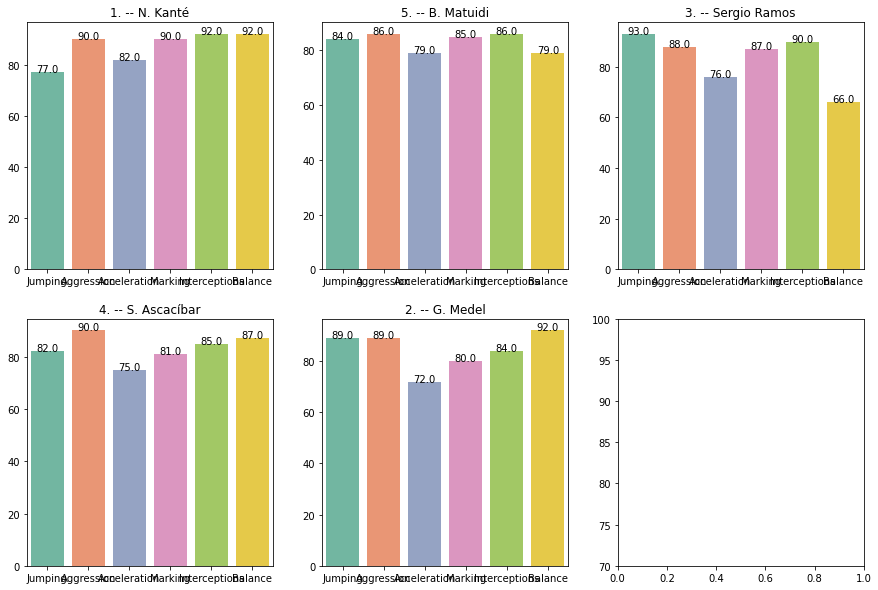

GKs: 


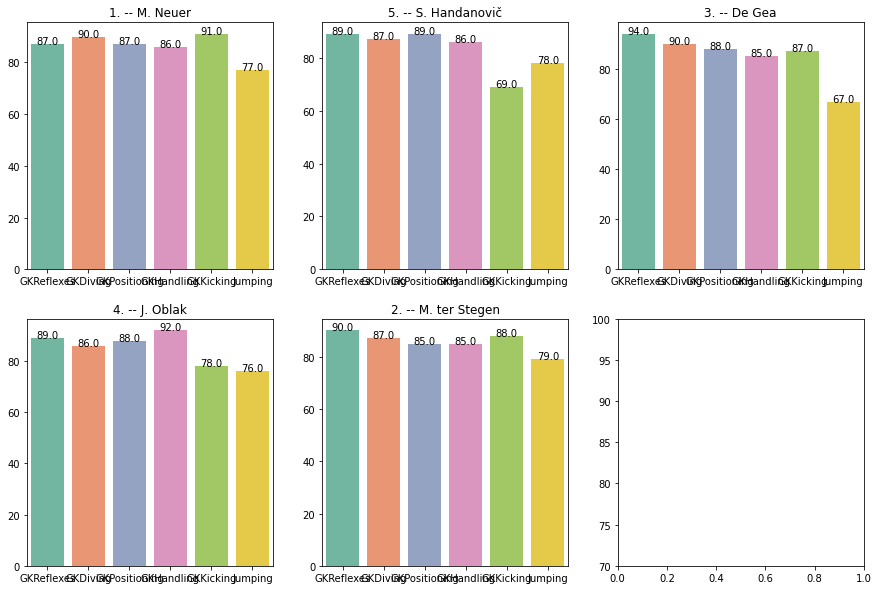

MIDs: 


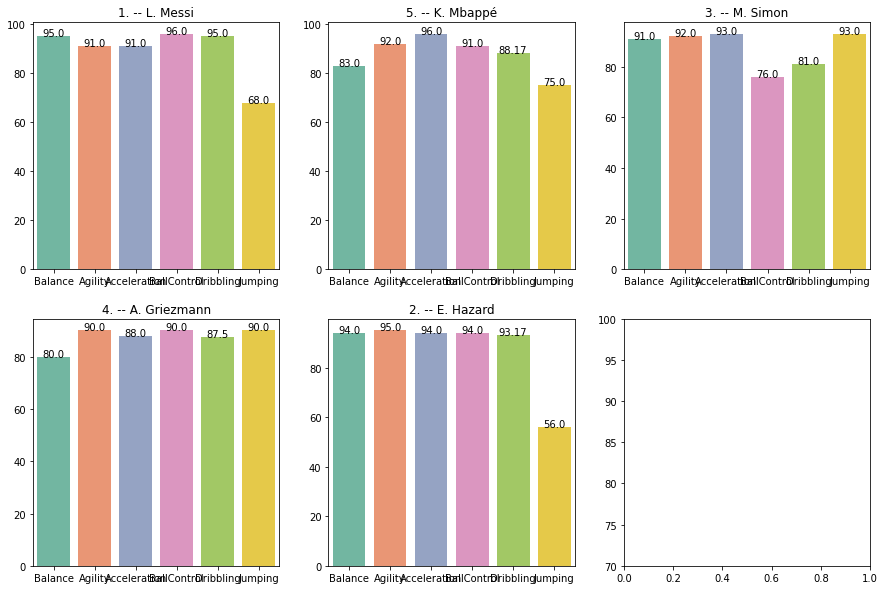

In [49]:
attribute = {
    'ATKs' : ['Acceleration', 'Agility', 'Balance', 'Jumping', 'Finishing', 'BallControl'],
    'DFs' : ['Jumping', 'Aggression', 'Acceleration', 'Marking', 'Interceptions', 'Balance'],
    'GKs' : ['GKReflexes', 'GKDiving', 'GKPositioning', 'GKHandling', 'GKKicking', 'Jumping'],
    'MIDs' : ['Balance', 'Agility', 'Acceleration', 'BallControl', 'Dribbling', 'Jumping']
}

for attr in attribute:
    new_data[attr] = new_data[attribute[attr]].mean(axis=1)
for attr in attribute:
    fig, ax = plt.subplots(2,3,figsize=(15,10))
    i = 0
    for idx, row in new_data.nlargest(5, attr).iterrows():
        p = sns.barplot(row[attribute[attr]].index, row[attribute[attr]].values,ax=ax[i%2,i%3],palette='Set2')
        ax[i%2,i%3].set_title(str(i+1)+'. -- '+row['Name'])
        plt.ylim(70,100)
        j = 0
        for idx2, val in row[attribute[attr]].iteritems():
            p.text(j, val, round(val,2),color='black',ha='center')
            j += 1
        i += 1
    print(f"===============================================================\n{attr}: ")
    plt.show()

In [50]:
idxs = ['ATKs','MIDs','DFs','GKs']
for idx in idxs:
    print(f"【{idx}】:\n{new_data.nlargest(5,idx).Name}\n")

【ATKs】:
0              L. Messi
1     Cristiano Ronaldo
17         A. Griezmann
23            S. Agüero
25            K. Mbappé
Name: Name, dtype: object

【MIDs】:
0           L. Messi
5          E. Hazard
1550        M. Simon
17      A. Griezmann
25         K. Mbappé
Name: Name, dtype: object

【DFs】:
14         N. Kanté
369        G. Medel
8      Sergio Ramos
733    S. Ascacíbar
103      B. Matuidi
Name: Name, dtype: object

【GKs】:
22         M. Neuer
18    M. ter Stegen
3            De Gea
9          J. Oblak
40    S. Handanovič
Name: Name, dtype: object



Task 8.分析工资、身价，综合评价的影响因素
====

In [51]:
data['Value'].replace('[€KM]', '', inplace=True, regex=True)
data['Value'] = data['Value'].astype(float)

In [52]:
sub_data = data[['Wage','Value','International Reputation','Overall']]
sub_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wage                      18207 non-null  int32  
 1   Value                     18207 non-null  float64
 2   International Reputation  18159 non-null  float64
 3   Overall                   18207 non-null  int64  
dtypes: float64(2), int32(1), int64(1)
memory usage: 498.0 KB


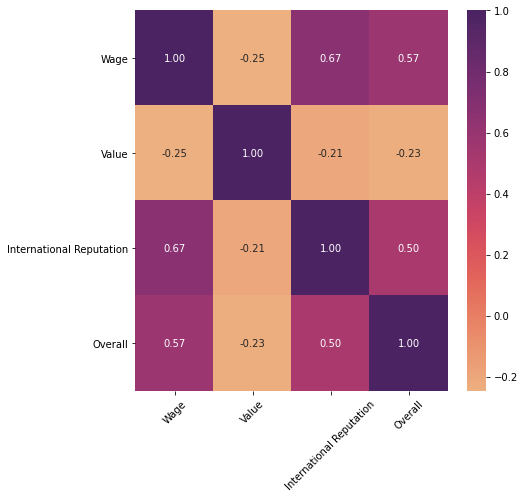

In [53]:
fig = plt.figure(figsize=(7,7))
sns.heatmap(sub_data.corr(),cmap='flare',annot=True,fmt=".2f")
plt.xticks(rotation=45)
plt.show()

In [54]:
new_data = data.drop(columns=data.columns[[0,1,2,4,5,6,9,10,22,23,24,25,*(list(range(28,54))),88]])
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18207 non-null  int64  
 1   Overall                   18207 non-null  int64  
 2   Potential                 18207 non-null  int64  
 3   Value                     18207 non-null  float64
 4   Wage                      18207 non-null  int32  
 5   Special                   18207 non-null  int64  
 6   Preferred Foot            18159 non-null  object 
 7   International Reputation  18159 non-null  float64
 8   Weak Foot                 18159 non-null  float64
 9   Skill Moves               18159 non-null  float64
 10  Work Rate                 18159 non-null  object 
 11  Body Type                 18159 non-null  object 
 12  Real Face                 18159 non-null  object 
 13  Position                  18147 non-null  object 
 14  Height

In [55]:
new_data['Preferred Foot'].unique()

array(['Left', 'Right', nan], dtype=object)

In [56]:
maps = {'Left':0, 'Right':1}
new_data['Preferred Foot'] = new_data['Preferred Foot'].map(maps)
new_data['Preferred Foot'] = new_data['Preferred Foot'].fillna(2)
new_data['Preferred Foot'].unique()

array([0., 1., 2.])

In [57]:
'''
1:ATK 2:MID 3:DF 4:GK 5:NAN
'''
map1 = {i : 1 for i in forward} 
map2 = {i : 2 for i in center}
map3 = {i : 3 for i in guard}
map4 = {i : 4 for i in gk}
maps = dict(**map1,**map2,**map3,**map4)
new_data['Position'] = new_data['Position'].map(maps)
new_data['Position'] = new_data['Position'].fillna(5)
new_data['Position'].unique()

array([1., 4., 2., 3., 5.])

In [58]:
new_data[['Work Rate','Body Type','Real Face','Height','Weight']].head(5)

,Work Rate,Body Type,Real Face,Height,Weight
0,Medium/ Medium,Messi,Yes,5'7,159lbs
1,High/ Low,C. Ronaldo,Yes,6'2,183lbs
2,High/ Medium,Neymar,Yes,5'9,150lbs
3,Medium/ Medium,Lean,Yes,6'4,168lbs
4,High/ High,Normal,Yes,5'11,154lbs


In [59]:
new_data['Work Rate'].unique()

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium',
       'Low/ Low', nan], dtype=object)

In [60]:
new_data['Work Rate'].value_counts()

Medium/ Medium    9810
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
Low/ Low            34
Name: Work Rate, dtype: int64

In [61]:
'''
low = 1, medium=2, high=3
'''
maps = {
    'Low/ Low':2,'Low/ Medium':3,'Low/ High':4,
    'Medium/ Low':3,'Medium/ Medium':4,'Medium/ High':5,
    'High/ Low':4,'High/ Medium':5,'High/ High':6
}
new_data['Work Rate'] = new_data['Work Rate'].map(maps)
new_data['Work Rate'] = new_data['Work Rate'].fillna(4)
new_data['Work Rate'].unique()

array([4., 5., 6., 3., 2.])

In [62]:
new_data['Body Type'].value_counts()

Normal                 10595
Lean                    6417
Stocky                  1140
Akinfenwa                  1
Courtois                   1
C. Ronaldo                 1
PLAYER_BODY_TYPE_25        1
Messi                      1
Shaqiri                    1
Neymar                     1
Name: Body Type, dtype: int64

In [63]:
maps = {
    'Normal':1, 'Lean':2, 'Stocky':3, 'Courtois':4, 'C. Ronaldo':5,
    'Akinfenwa':5, 'Messi':5, 'Neymar':5, 'Shaqiri':5, 'PLAYER_BODY_TYPE_25':5
}
new_data['Body Type'] = new_data['Body Type'].map(maps)
new_data['Body Type'] = new_data['Body Type'].fillna(1)
new_data['Body Type'].unique()

array([5., 2., 1., 4., 3.])

In [64]:
new_data['Real Face'].value_counts()

No     16505
Yes     1654
Name: Real Face, dtype: int64

In [65]:
maps = {'No':0, 'Yes':1}
new_data['Real Face'] = new_data['Real Face'].map(maps)
new_data['Real Face'] = new_data['Real Face'].fillna(0)
new_data['Real Face'].unique()

array([1., 0.])

In [66]:
new_data['Weight'].isnull().sum()

48

In [67]:
new_data['Weight'].replace('[lbs]', '', inplace=True, regex=True)
new_data['Weight'] = new_data['Weight'].astype(float)
new_data['Weight'] = new_data['Weight'].fillna(new_data['Weight'].mean())
new_data['Weight'].isnull().sum()

0

In [68]:
new_data[['H1','H2']] = new_data['Height'].str.extract("(\d+)\'(\d+)",expand=False)
new_data[['H1','H2']] = new_data[['H1','H2']].astype(float)
new_data['Height'] = new_data['H1']*12+new_data['H2']
new_data = new_data.drop(columns=['H1','H2'])
new_data['Height'].head(5)

0    67.0
1    74.0
2    69.0
3    76.0
4    71.0
Name: Height, dtype: float64

In [69]:
'''
填充缺失值
'''

avg = ['International Reputation','Skill Moves','Height','Crossing','Finishing','HeadingAccuracy','ShortPassing',
      'Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed',
      'Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression',
      'Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle',
      'GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']
new_data['Weak Foot'] = new_data['Weak Foot'].fillna(3)
for idx in avg:
    new_data[idx] = new_data[idx].fillna(new_data[idx].mean())
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18207 non-null  int64  
 1   Overall                   18207 non-null  int64  
 2   Potential                 18207 non-null  int64  
 3   Value                     18207 non-null  float64
 4   Wage                      18207 non-null  int32  
 5   Special                   18207 non-null  int64  
 6   Preferred Foot            18207 non-null  float64
 7   International Reputation  18207 non-null  float64
 8   Weak Foot                 18207 non-null  float64
 9   Skill Moves               18207 non-null  float64
 10  Work Rate                 18207 non-null  float64
 11  Body Type                 18207 non-null  float64
 12  Real Face                 18207 non-null  float64
 13  Position                  18207 non-null  float64
 14  Height

<AxesSubplot:>

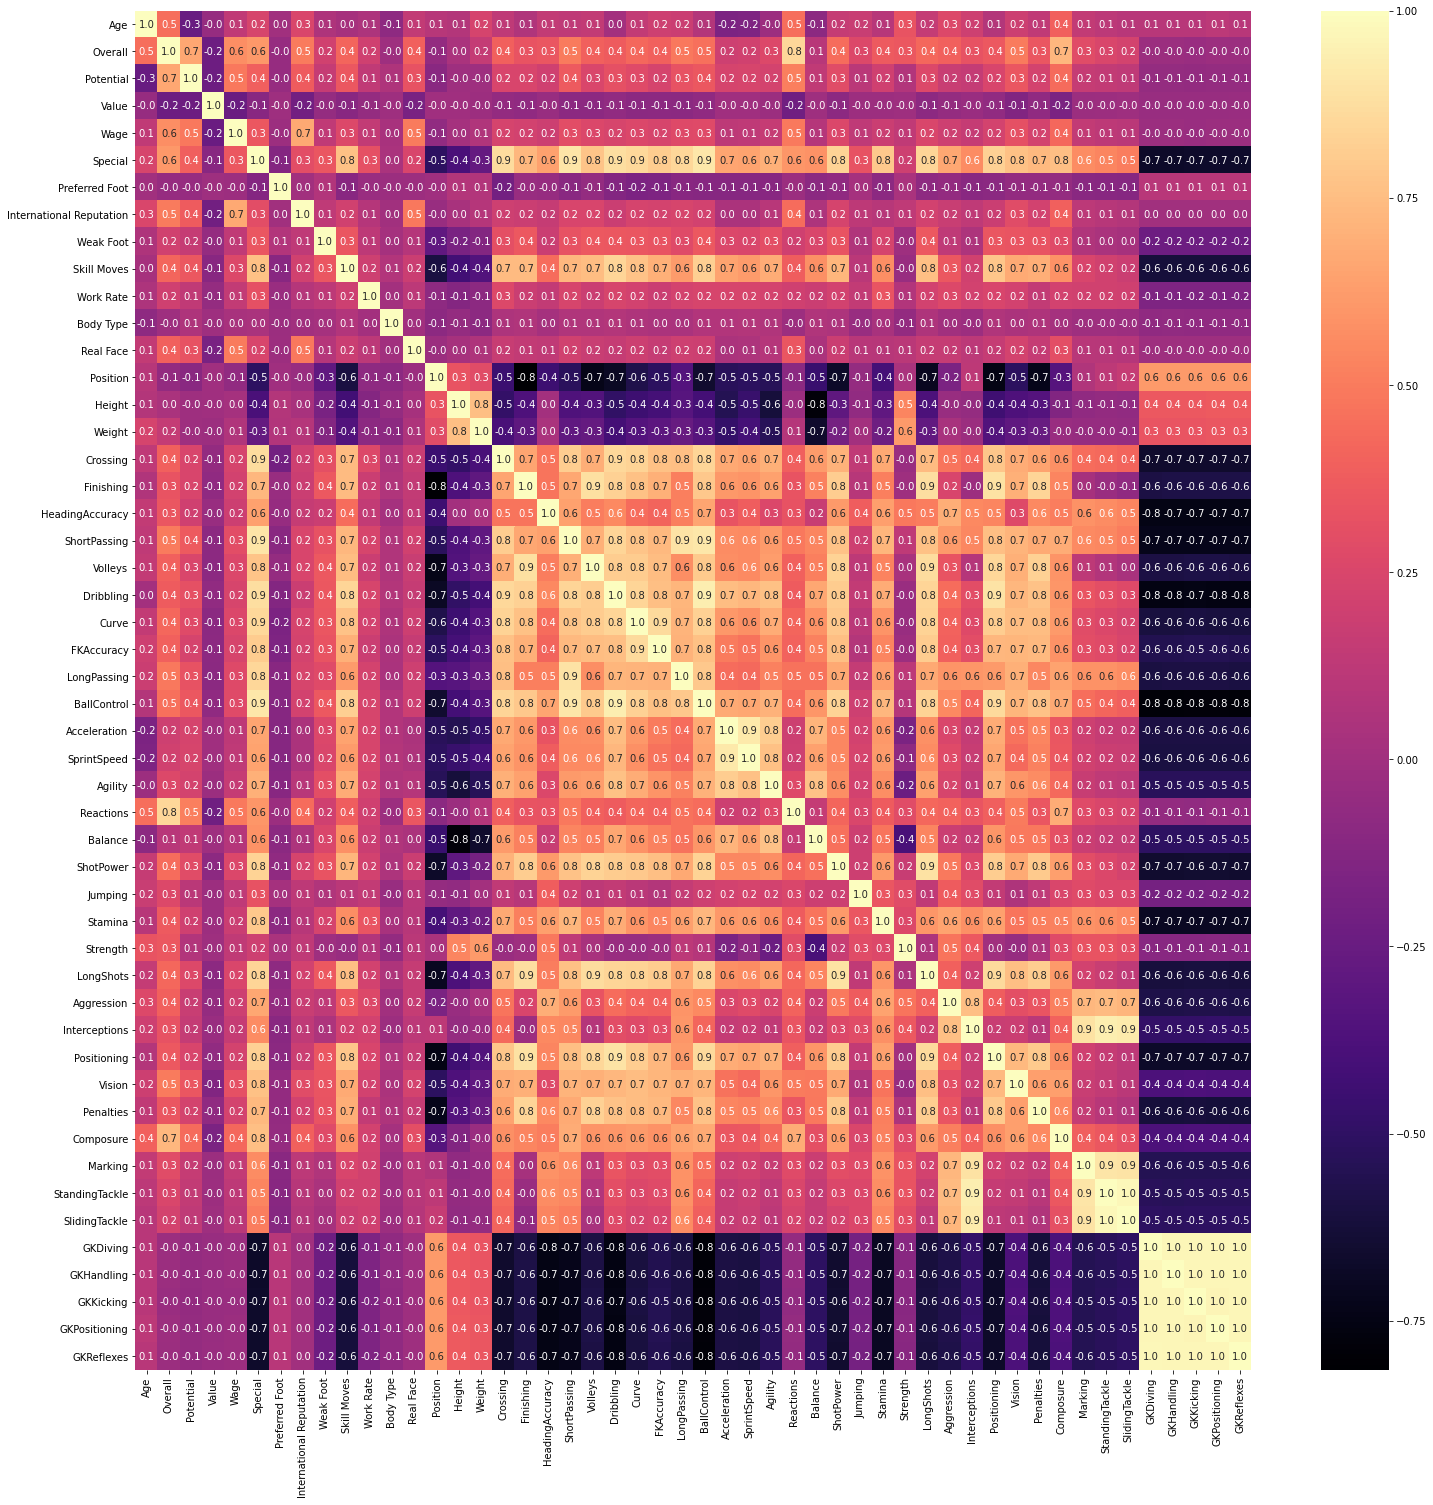

In [70]:
'''
从热力图可以看出：
 1. Value：与各特征的相关性不强
 2. Wage：与【总体评价，潜力，国际声誉，Real Face，反应力】，有相对高的相关性
 3. Overall：与【年龄，潜力，特质，国际声誉，短传，长传，控球，反应力，视角，沉着】，有相对高的相关性
'''

Overall_data = new_data['Overall'].copy()
Value_data = new_data['Value'].copy()
Wage_data = new_data['Wage'].copy()

plt.figure(figsize=(25,25))
sns.heatmap(new_data.corr(),cmap='magma',annot=True,fmt='.1f')

In [71]:
new_data = new_data.drop(columns=['Value'])

In [72]:
new_data.to_csv("./new_data.csv")